## Assignment 2 Data Analysis using Pandas

This assignment will contain 2 question with details as below. Each late day will result in 20% loss of total points.

### Question 1 (20 points) Datacamp courses

Datacamp is the online learning platform for data science courses and modules. As the only collaborator in Portugal, this course provides free access to the students in Business Analytics as the complementary resource. For this assignment, you are expected to complete the following moduels and submit your completion badges:

- [Importing & Cleaning Data with Python](https://app.datacamp.com/learn/skill-tracks/importing-cleaning-data-with-python)
- [Data Manipulation with Python](https://app.datacamp.com/learn/skill-tracks/data-manipulation-with-python)

Each badge will account for 10 points. If you are confident with the knowledge, you may skip the videos and directly finish the challenges. You can submit the badge by the end of the October if you would need more time. 

### Question 2 (80 points) Celluloid ceiling

Wonder Woman             |  Captain Marvel
:-------------------------:|:-------------------------:
![wonderwoman](https://upload.wikimedia.org/wikipedia/en/4/4f/Wonder_Woman_1984_poster.png) | ![marvel](https://upload.wikimedia.org/wikipedia/pt/5/59/Captain_Marvel_%282018%29.jpg)

Women are involved in the film industry in all roles, including as film directors, actresses, cinematographers, film producers, film critics, and other film industry professions, though women have been underrepresented in all these positions. Studies found that women have always had a presence in film acting, but have consistently been underrepresented, and on average significantly less well paid. 

In 2015, Forbes reported that "...just 21 of the 100 top-grossing films of 2014 featured a female lead or co-lead, while only 28.1% of characters in 100 top-grossing films were female... This means it’s much rarer for women to get the sort of blockbuster role which would warrant the massive backend deals many male counterparts demand (Tom Cruise in Mission: Impossible or Robert Downey Jr. in Iron Man, for example)".

Also, Forbes' analysis of US acting salaries in 2013 determined that the "...men on Forbes’ list of top-paid actors for that year made 2½ times as much money as the top-paid actresses. That means that Hollywood's best-compensated actresses made just 40 cents for every dollar that the best-compensated men made. 


In this assignment, we want to examine whether and how women representation is lacking in the film industry. We will adopt The Bechdel test as a measure of the representation of women in the film industry. The test is named after the American cartoonist Alison Bechdel in whose 1985 comic strip Dykes to Watch Out For the test first appeared. **A movie is said to meet the Bechdel test  following three criteria: (1) it has to have at least two women in it, who (2) who talk to each other, about (3) something besides a man.**

We are going to obtain the data ourselves to perform the analysis. Specifically, we will retrieve the movie metadata from IMDB (Internet Movie Database), an online database of information related to films, television programs, home videos, video games, and streaming content online – including cast, production crew and personal biographies, plot summaries, trivia, ratings, and fan and critical reviews. As of January 2020, IMDb has approximately 6.5 million titles (including episodes) and 10.4 million personalities in its database, as well as 83 million registered users.


The IMDb Top 250 is a list of the top rated 250 films, based on ratings by the registered users of the website using the methods described. We will focus on these famous movies in this analysis:

**Question 2.1** (25 points): We will retrieve the metadata of IMDb Top 250 movies from the [IMDb charts](https://www.imdb.com/chart/top/). For each movie on the list, we can scrape the following characteristics from the information page. For example, from the [page of top rated movie "The Shawshank Redemption"](https://www.imdb.com/title/tt0111161/?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=e31d89dd-322d-4646-8962-327b42fe94b1&pf_rd_r=F4QFC0SVZN1HTDHCY3C0&pf_rd_s=center-1&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_tt_1), we want to extract the metadata about this movie as:
- IMDb id (0111161)
- Movie name (The Shawshank Redemption)
- Year (1994)
- Director (Frank Darabont)
- Stars (Tim Robbins, Morgan Freeman, Bob Gunton)
- Rating (9.3)
- Number of reviews (2.6M)
- Genres (Drama)
- Country (USA)
- Language (English)
- Budget (\$25,000,000)
- Gross box Office Revenue (\$28,884,504)

![imdb](https://mrfloris.com/files/images/imdb-top250-page-start.png)


After scraping the 250 movies, save the data as a dataframe ```imdb_top_movies```. 

Also, saving the dataframe to a local file ```imdb_top_movies.csv``` so that later you can load it without scraping the website twice.

Hint: You can get the links to these movies from the IMDb top chart page, and then scrape each movie page by sending the request to these links. At each movie page, the information requested are located at different sections. 

In [77]:
import pandas as pd
import numpy as np
import requests
from datetime import time
from datetime import datetime
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt


# Retrieve the HTML

# Start access of the html of the website
URL = "https://www.imdb.com/chart/top/"
headers = {"Accept-Language": "en-US,en;q=0.5"}
page = requests.get(URL, headers=headers)
# print(page.text)
# Use page.content to work with bytes instead of text makes less problems
soup_original = BeautifulSoup(page.content, "html.parser")


# Scrap urls about movies in one list for getting more details from the reference links of the movies

movie_elements = soup_original.find_all("td", class_="titleColumn")

list_urls = []
for link in movie_elements:
    find_link = link.find("a")
    data = find_link.get("href")
    string_https = "https://www.imdb.com"
    full_url = string_https + data
    list_urls.append(full_url)

In [78]:
# Scrapping the deatils of Top 250 movies
dict_all = {}

for i in range(len(list_urls)):
    details_movies = {}
    headers = {"Accept-Language": "en-US,en;q=0.5"}
    movie_url = requests.get(list_urls[i], headers=headers)
    soup_movie = BeautifulSoup(movie_url.content, "html.parser")
    #print("urls "+ movie_url.url)
    # IMDb_id
    try:
        movie_id = soup_original.find_all("td", class_="titleColumn")
        location = movie_id[i].find("a")
        data_id = location.get("href")[9:-1]
        details_movies["IMDb_id"] = data_id
    except:
        print("Error1 "+"Iteration= "+str(i))
    # Movie_name
    try:
        movie_name = soup_movie.find("h1", {"data-testid":"hero-title-block__title"}).text
        details_movies["Movie_name"] = movie_name
    except:
        print("Error2 "+"Iteration= "+str(i))
    #Year
    try:
        location_year = soup_original.find_all("td", class_="titleColumn")
        movie_year = location_year[i].find("span").text[1:-1]
        #movie_year2 = datetime(int(movie_year1),1,1)
        details_movies["Year"] = int(movie_year)
    except:
        print("Error3 "+"Iteration= "+str(i))
    #Director
    try:
        movie_director = soup_original.find_all("td", class_="titleColumn")
        location = movie_director[i].find("a")
        data_dir1 = location.get("title").split(",")
        data_dir2 = data_dir1[0][:-7]
        details_movies["Director"] = data_dir2
    except:
        print("Error4 "+"Iteration= "+str(i))

    #Stars
    try:
        stars_list = []
        links = soup_movie.find_all("a", attrs={"data-testid":"title-cast-item__actor"})[0:3]
        for actors in links:
            stars_list.append(actors.text)
        details_movies["Stars"] = stars_list
    except:
        print("Error5 "+"Iteration= "+str(i))
    #Rating
    try:
        movie_rating = soup_movie.find("div", {"data-testid":"hero-rating-bar__aggregate-rating__score"}).text[:-3]
        details_movies["Rating"] = float(movie_rating)
    except:
        print("Error6 "+"Iteration= "+str(i))
    #Number_of_reviews
    try:
        movie_reviews = soup_movie.find("div",class_="sc-7ab21ed2-3").text
        details_movies["Number_of_reviews"] = movie_reviews
    except:
        print("Error7 "+"Iteration= "+str(i))
    #Genres
    try:
        movies_genres = soup_movie.find_all("span", class_= "ipc-chip__text")
        genres_list = []
        for j in movies_genres:
            genres_list.append(j.text)
        details_movies["Genres"] = genres_list
    except:
        print("Error8 "+"Iteration= "+str(i))
    #Country
    try:
        movies_country = soup_movie.find("li", attrs={"data-testid":"title-details-origin"}).find("a").text
        details_movies["Country"] = movies_country
    except:
        print("Error9 "+"Iteration= "+str(i))
    #Language
    try:
        location_language = soup_movie.find("li", attrs={"data-testid":"title-details-languages"})
        movies_language = location_language.find_all("a")
        language_list = []
        for k in movies_language:
            language_list.append(k.text)
        details_movies["Language"] = language_list
    except:
        print("Error10 "+"Iteration= "+str(i))
    #Budget
    try:
        movie_budget_1 = soup_movie.find("li", attrs={"data-testid":"title-boxoffice-budget"}).find("li").text[:-12]
        movie_budget_2 = movie_budget_1.replace(",","")
        details_movies["Budget"] = movie_budget_2
    except:
        details_movies["Budget"] = np.nan
    #Gross_box_Office_Revenue
    try:
        movie_gross_1 = soup_movie.find("li", attrs={"data-testid":"title-boxoffice-cumulativeworldwidegross"}).find("li").text
        movie_gross_2 = movie_gross_1.replace(",","")
        details_movies["Gross_box_Office_Revenue"] = movie_gross_2
    except:
        details_movies["Gross_box_Office_Revenue"] = np.nan
    # Runtime
    location_runtime = soup_movie.find("span", text = "Runtime").next_sibling.text.split()
    try:
        movie_runtime = time(hour=int(location_runtime[0]), minute = int(location_runtime[2]))
        details_movies["Runtime"] = movie_runtime
    except:
        if ("hours" in location_runtime):
            movie_runtime = time(hour=int(location_runtime[0]))
            details_movies["Runtime"] = movie_runtime

        if ("minutes" in location_runtime):
            movie_runtime = time(minute = int(location_runtime[0]))
            details_movies["Runtime"] = movie_runtime
    

    # Dict_movie in Dict_global speichern
    dict_all["movie_id_"+str(data_id)] = details_movies
print(dict_all)

{'movie_id_0111161': {'IMDb_id': '0111161', 'Movie_name': 'The Shawshank Redemption', 'Year': 1994, 'Director': 'Frank Darabont', 'Stars': ['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'], 'Rating': 9.3, 'Number_of_reviews': '2.7M', 'Genres': ['Drama'], 'Country': 'United States', 'Language': ['English'], 'Budget': '$25000000', 'Gross_box_Office_Revenue': '$28884504', 'Runtime': datetime.time(2, 22)}, 'movie_id_0068646': {'IMDb_id': '0068646', 'Movie_name': 'The Godfather', 'Year': 1972, 'Director': 'Francis Ford Coppola', 'Stars': ['Marlon Brando', 'Al Pacino', 'James Caan'], 'Rating': 9.2, 'Number_of_reviews': '1.8M', 'Genres': ['Crime', 'Drama'], 'Country': 'United States', 'Language': ['English', 'Italian', 'Latin'], 'Budget': '$6000000', 'Gross_box_Office_Revenue': '$250341816', 'Runtime': datetime.time(2, 55)}, 'movie_id_0468569': {'IMDb_id': '0468569', 'Movie_name': 'The Dark Knight', 'Year': 2008, 'Director': 'Christopher Nolan', 'Stars': ['Christian Bale', 'Heath Ledger', 'Aaro

In [79]:
# Transform dictionary all movies to dataframe manually

column_names = ["IMDb_id","Movie_name","Year","Director","Stars","Rating","Number_of_reviews","Genres","Country","Language",
                "Budget","Gross_box_Office_Revenue","Runtime"]
imdb_top_movies = pd.DataFrame(columns=column_names)

for key in dict_all:
    movie_dict_key = dict_all[key]
    imdb_top_movies.loc[len(imdb_top_movies)] = [movie_dict_key["IMDb_id"],movie_dict_key["Movie_name"],movie_dict_key["Year"],
                                                movie_dict_key["Director"],movie_dict_key["Stars"],movie_dict_key["Rating"],
                                                movie_dict_key["Number_of_reviews"],movie_dict_key["Genres"],movie_dict_key["Country"],
                                                movie_dict_key["Language"], movie_dict_key["Budget"],movie_dict_key["Gross_box_Office_Revenue"],
                                                movie_dict_key["Runtime"]]

# Write to csv
imdb_top_movies.to_csv("imdb_top_movies.csv")
display(imdb_top_movies)

,IMDb_id,Movie_name,Year,Director,Stars,Rating,Number_of_reviews,Genres,Country,Language,Budget,Gross_box_Office_Revenue,Runtime
0,0111161,The Shawshank Redemption,1994,Frank Darabont,"[Tim Robbins, Morgan Freeman, Bob Gunton]",9.3,2.7M,[Drama],United States,[English],$25000000,$28884504,02:22:00
1,0068646,The Godfather,1972,Francis Ford Coppola,"[Marlon Brando, Al Pacino, James Caan]",9.2,1.8M,"[Crime, Drama]",United States,"[English, Italian, Latin]",$6000000,$250341816,02:55:00
2,0468569,The Dark Knight,2008,Christopher Nolan,"[Christian Bale, Heath Ledger, Aaron Eckhart]",9.0,2.6M,"[Action, Crime, Drama]",United States,"[English, Mandarin]",$185000000,$1006234167,02:32:00
3,0071562,The Godfather Part II,1974,Francis Ford Coppola,"[Al Pacino, Robert De Niro, Robert Duvall]",9.0,1.3M,"[Crime, Drama]",United States,"[English, Italian, Spanish, Latin, Sicilian]",$13000000,$47961919,03:22:00
4,0050083,12 Angry Men,1957,Sidney Lumet,"[Henry Fonda, Lee J. Cobb, Martin Balsam]",9.0,783K,"[Crime, Drama]",United States,[English],$350000,$955,01:36:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0071411,Dersu Uzala,1975,Akira Kurosawa,"[Maksim Munzuk, Yuriy Solomin, Mikhail Bychkov]",8.2,30K,"[Adventure, Biography, Drama]",Soviet Union,"[Russian, Chinese]",$4000000,$14480,02:22:00
246,0083987,Gandhi,1982,Richard Attenborough,"[Ben Kingsley, John Gielgud, Rohini Hattangadi]",8.1,232K,"[Biography, Drama]",United Kingdom,"[English, Hindi]",$22000000,$52767889,03:11:00
247,1454029,The Help,2011,Tate Taylor,"[Viola Davis, Emma Stone, Octavia Spencer]",8.1,458K,[Drama],United States,[English],$25000000,$216639112,02:26:00
248,0103639,Aladdin,1992,Ron Clements,"[Scott Weinger, Robin Williams, Linda Larkin]",8.0,417K,"[Animation, Adventure, Comedy]",United States,[English],$28000000,$504050219,01:30:00


**Question 2.2** (5 points) If you group the movies by release years, show the number of movies at each decade in descending order.

In [80]:
#Alternative read_csv but i am working with the created dataframe without loading the csv
movie_df = pd.read_csv("imdb_top_movies.csv")

In [81]:
# Group by year and count decade 
year_group = imdb_top_movies["IMDb_id"].groupby((imdb_top_movies.Year//10)*10).count().sort_values(ascending=False)
display(year_group)

Year
2000    48
2010    43
1990    41
1980    27
1950    23
1970    19
1960    18
1940    12
1930     7
1920     6
2020     6
Name: IMDb_id, dtype: int64

**Quesion 2.3** (5 points) Show the number of movies by the distribution of runtime at quartile (0-25%, 25-50%, 50-75%, 75-100%).

In [82]:
# First option using the qcut function
# As discussed during the class we should use the qcut function
# sort values on runtime
imdb_top_movies_sorted_1 = imdb_top_movies.sort_values(by ="Runtime", ascending=False)

# Convert Runtime from datetime in int
imdb_top_movies_sorted_1["Runtime"] = pd.to_timedelta(imdb_top_movies_sorted_1["Runtime"].astype(str)).dt.total_seconds()/60
imdb_top_movies_sorted_2 = imdb_top_movies_sorted_1.reset_index().drop(columns="index")
# Cut the df in four equal parts --> 4 quantile in size 25% are split the df in 4 ewaul parts #df["new col"].value_counts()
runtime_distribution = pd.qcut(imdb_top_movies_sorted_2.Runtime, q=4, labels=["quartile 0-25%","quartile 25%-50%", "quartile 50%-75%",
                                                                "quartile 75%-100%"]).value_counts()
display(runtime_distribution)



# Second option calculation of the distribution manually
df =pd.DataFrame(columns=["quantile","number_movies"])

longest_movie = imdb_top_movies_sorted_1.Runtime.max()

list_0_25 =[]
list_25_50 =[]
list_50_75 =[]
list_75_100 =[]

for index in imdb_top_movies_sorted_2.index:
    if int(imdb_top_movies_sorted_2.iloc[index,12]) < (0.25 * int(longest_movie)):
        list_0_25.append(index)
    elif int(imdb_top_movies_sorted_2.iloc[index,12]) >= (0.25 * int(longest_movie)) and imdb_top_movies_sorted_2.iloc[index,12]<(0.5 * int(longest_movie)):
        list_25_50.append(index)
    elif int(imdb_top_movies_sorted_2.iloc[index,12]) >= (0.5 * int(longest_movie)) and imdb_top_movies_sorted_2.iloc[index,12]<(0.75 * int(longest_movie)):
        list_50_75.append(index)
    else:
        list_75_100.append(index)

number_0_25 = 0
for i in list_0_25:
    number_0_25+= 1

number_25_50 = 0
for i in list_25_50:
    number_25_50+= 1
    
number_50_75 = 0
for i in list_50_75:
    number_50_75+= 1
    
number_75_100 = 0
for i in list_75_100:
    number_75_100+= 1

print("Manuel calcualtion of the distribution:/n")
print("Quartile 0-25%: "+str(number_0_25))
print("Quartile 25-50%: "+str(number_25_50))
print("Quartile 50-75%: "+str(number_50_75))
print("Quartile 75-100%: "+str(number_75_100))

quartile 0-25%       63
quartile 50%-75%     63
quartile 25%-50%     62
quartile 75%-100%    62
Name: Runtime, dtype: int64

Manuel calcualtion of the distribution:/n
Quartile 0-25%: 1
Quartile 25-50%: 93
Quartile 50-75%: 140
Quartile 75-100%: 16


**Question 2.4** (5 points) Show the top 10 most popular actor/actresses in terms of number of movies they have starred. 

In [83]:
stars_group = imdb_top_movies[["IMDb_id","Stars"]].explode("Stars").groupby(by="Stars").count().sort_values(by="IMDb_id", ascending= False)
display(stars_group)

,IMDb_id
Stars,
Robert De Niro,9
Tom Hanks,6
Harrison Ford,6
Leonardo DiCaprio,6
Clint Eastwood,5
...,...
Gustav Fröhlich,1
Gunnar Björnstrand,1
Gregory Peck,1


**Question 2.5** (5 points) Show the average ratings of movies across the genres and decades.

In [84]:
#Add column decade
imdb_top_movies["decade"] = (imdb_top_movies.Year//10)*10
# Explode by genre
df_explode = imdb_top_movies.explode("Genres")
#Groupby genre and decade
genres_decade_group = df_explode.groupby(["Genres","decade"]).mean()
# Drop other columns
average_rating = genres_decade_group.drop(columns="Year")
display(average_rating)

# Groupby decade
decade_group = df_explode[["decade","Rating"]].groupby("decade").mean()
display(decade_group)
# Groupby genres
genres_group = df_explode[["Genres","Rating"]].groupby("Genres").mean()
display(genres_group)

Rating
Genres  decade          
Action  1920    8.200000
        1950    8.450000
        1960    8.400000
        1970    8.600000
        1980    8.288889
...                  ...
War     2010    8.200000
Western 1940    8.200000
        1960    8.500000
        1990    8.200000
        2010    8.400000

[150 rows x 1 columns]

,Rating
decade,
1920,8.229412
1930,8.273684
1940,8.274194
1950,8.286275
1960,8.316667
1970,8.346341
1980,8.293939
1990,8.389000
2000,8.311811


,Rating
Genres,
Action,8.350980
Adventure,8.305000
Animation,8.252174
Biography,8.251724
Comedy,8.230435
Crime,8.362745
Drama,8.325000
Family,8.261538
Fantasy,8.314286


**Question 2.6** (10 points) Now let's retrieve data from Bechdel Test Movie website [for each movie](https://bechdeltest.com/). You can send the requests to the API: https://bechdeltest.com/api/v1/doc#getMovieByImdbId. For example, for the movie The Shawshank Redemption (the IMDb id: 0111161), you can simply call: http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0111161. 

Create a dataframe ```bechdel_imdb_top``` that merge the bechdel test info with the ```imdb_top_movies``` show how many top 250 movies are also in the bechdel test website.

In [85]:
# Manually getting infos of all movies
# Creates a list of all ids
movie_ids = []
for i in range(len(list_urls)):
    movie_id = soup_original.find_all("td", class_="titleColumn")
    location = movie_id[i].find("a")
    data_id = location.get("href")[9:-1]
    movie_ids.append(data_id)

In [86]:
# API request
columns_df = ["title","imdbid","visible","submitterid","rating","id","dubious","date","year"]
bechdel_movies_info = pd.DataFrame(columns=columns_df)

URL_5 = "http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid="

for i in movie_ids:
    print(URL_5+i)
    page_5 = requests.get(URL_5+i)
    bechdel_imdb_top_5 = pd.read_json(page_5.text, orient ="index").T
    bechdel_movies_info = pd.concat([bechdel_movies_info, bechdel_imdb_top_5]).reset_index().drop(columns="index")
    display(bechdel_movies_info)



http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0111161


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0068646


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0468569


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0071562


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0050083


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0108052


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
5,Schindler&#39;s List,0108052,1,1761,3,1497,0,2010-08-23 23:37:44,1993


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0167260


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
5,Schindler&#39;s List,0108052,1,1761,3,1497,0,2010-08-23 23:37:44,1993
6,"Lord of the Rings: The Return of the King, The",0167260,1,6,1,248,None,2009-01-02 22:13:37,2003


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0110912


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
5,Schindler&#39;s List,0108052,1,1761,3,1497,0,2010-08-23 23:37:44,1993
6,"Lord of the Rings: The Return of the King, The",0167260,1,6,1,248,None,2009-01-02 22:13:37,2003
7,Pulp Fiction,0110912,1,1,3,91,None,2008-07-29 17:23:28,1994


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0120737


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
5,Schindler&#39;s List,0108052,1,1761,3,1497,0,2010-08-23 23:37:44,1993
6,"Lord of the Rings: The Return of the King, The",0167260,1,6,1,248,None,2009-01-02 22:13:37,2003
7,Pulp Fiction,0110912,1,1,3,91,None,2008-07-29 17:23:28,1994
8,"Lord of the Rings: The Fellowship of the Ring,...",0120737,1,6,1,246,None,2009-01-02 22:03:45,2001


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0060196


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
5,Schindler&#39;s List,0108052,1,1761,3,1497,0,2010-08-23 23:37:44,1993
6,"Lord of the Rings: The Return of the King, The",0167260,1,6,1,248,None,2009-01-02 22:13:37,2003
7,Pulp Fiction,0110912,1,1,3,91,None,2008-07-29 17:23:28,1994
8,"Lord of the Rings: The Fellowship of the Ring,...",0120737,1,6,1,246,None,2009-01-02 22:03:45,2001
9,"Good, the Bad and the Ugly, The",0060196,1,2171,1,1725,0,2010-11-02 05:35:40,1966


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0109830


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
5,Schindler&#39;s List,0108052,1,1761,3,1497,0,2010-08-23 23:37:44,1993
6,"Lord of the Rings: The Return of the King, The",0167260,1,6,1,248,None,2009-01-02 22:13:37,2003
7,Pulp Fiction,0110912,1,1,3,91,None,2008-07-29 17:23:28,1994
8,"Lord of the Rings: The Fellowship of the Ring,...",0120737,1,6,1,246,None,2009-01-02 22:03:45,2001
9,"Good, the Bad and the Ugly, The",0060196,1,2171,1,1725,0,2010-11-02 05:35:40,1966


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0137523


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
5,Schindler&#39;s List,0108052,1,1761,3,1497,0,2010-08-23 23:37:44,1993
6,"Lord of the Rings: The Return of the King, The",0167260,1,6,1,248,None,2009-01-02 22:13:37,2003
7,Pulp Fiction,0110912,1,1,3,91,None,2008-07-29 17:23:28,1994
8,"Lord of the Rings: The Fellowship of the Ring,...",0120737,1,6,1,246,None,2009-01-02 22:03:45,2001
9,"Good, the Bad and the Ugly, The",0060196,1,2171,1,1725,0,2010-11-02 05:35:40,1966


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=1375666


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
5,Schindler&#39;s List,0108052,1,1761,3,1497,0,2010-08-23 23:37:44,1993
6,"Lord of the Rings: The Return of the King, The",0167260,1,6,1,248,None,2009-01-02 22:13:37,2003
7,Pulp Fiction,0110912,1,1,3,91,None,2008-07-29 17:23:28,1994
8,"Lord of the Rings: The Fellowship of the Ring,...",0120737,1,6,1,246,None,2009-01-02 22:03:45,2001
9,"Good, the Bad and the Ugly, The",0060196,1,2171,1,1725,0,2010-11-02 05:35:40,1966


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0167261


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
5,Schindler&#39;s List,0108052,1,1761,3,1497,0,2010-08-23 23:37:44,1993
6,"Lord of the Rings: The Return of the King, The",0167260,1,6,1,248,None,2009-01-02 22:13:37,2003
7,Pulp Fiction,0110912,1,1,3,91,None,2008-07-29 17:23:28,1994
8,"Lord of the Rings: The Fellowship of the Ring,...",0120737,1,6,1,246,None,2009-01-02 22:03:45,2001
9,"Good, the Bad and the Ugly, The",0060196,1,2171,1,1725,0,2010-11-02 05:35:40,1966


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0080684


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
5,Schindler&#39;s List,0108052,1,1761,3,1497,0,2010-08-23 23:37:44,1993
6,"Lord of the Rings: The Return of the King, The",0167260,1,6,1,248,None,2009-01-02 22:13:37,2003
7,Pulp Fiction,0110912,1,1,3,91,None,2008-07-29 17:23:28,1994
8,"Lord of the Rings: The Fellowship of the Ring,...",0120737,1,6,1,246,None,2009-01-02 22:03:45,2001
9,"Good, the Bad and the Ugly, The",0060196,1,2171,1,1725,0,2010-11-02 05:35:40,1966


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0133093


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
5,Schindler&#39;s List,0108052,1,1761,3,1497,0,2010-08-23 23:37:44,1993
6,"Lord of the Rings: The Return of the King, The",0167260,1,6,1,248,None,2009-01-02 22:13:37,2003
7,Pulp Fiction,0110912,1,1,3,91,None,2008-07-29 17:23:28,1994
8,"Lord of the Rings: The Fellowship of the Ring,...",0120737,1,6,1,246,None,2009-01-02 22:03:45,2001
9,"Good, the Bad and the Ugly, The",0060196,1,2171,1,1725,0,2010-11-02 05:35:40,1966


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0099685


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
5,Schindler&#39;s List,0108052,1,1761,3,1497,0,2010-08-23 23:37:44,1993
6,"Lord of the Rings: The Return of the King, The",0167260,1,6,1,248,None,2009-01-02 22:13:37,2003
7,Pulp Fiction,0110912,1,1,3,91,None,2008-07-29 17:23:28,1994
8,"Lord of the Rings: The Fellowship of the Ring,...",0120737,1,6,1,246,None,2009-01-02 22:03:45,2001
9,"Good, the Bad and the Ugly, The",0060196,1,2171,1,1725,0,2010-11-02 05:35:40,1966


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0073486


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
5,Schindler&#39;s List,0108052,1,1761,3,1497,0,2010-08-23 23:37:44,1993
6,"Lord of the Rings: The Return of the King, The",0167260,1,6,1,248,None,2009-01-02 22:13:37,2003
7,Pulp Fiction,0110912,1,1,3,91,None,2008-07-29 17:23:28,1994
8,"Lord of the Rings: The Fellowship of the Ring,...",0120737,1,6,1,246,None,2009-01-02 22:03:45,2001
9,"Good, the Bad and the Ugly, The",0060196,1,2171,1,1725,0,2010-11-02 05:35:40,1966


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0114369


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
5,Schindler&#39;s List,0108052,1,1761,3,1497,0,2010-08-23 23:37:44,1993
6,"Lord of the Rings: The Return of the King, The",0167260,1,6,1,248,None,2009-01-02 22:13:37,2003
7,Pulp Fiction,0110912,1,1,3,91,None,2008-07-29 17:23:28,1994
8,"Lord of the Rings: The Fellowship of the Ring,...",0120737,1,6,1,246,None,2009-01-02 22:03:45,2001
9,"Good, the Bad and the Ugly, The",0060196,1,2171,1,1725,0,2010-11-02 05:35:40,1966


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0047478


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
5,Schindler&#39;s List,0108052,1,1761,3,1497,0,2010-08-23 23:37:44,1993
6,"Lord of the Rings: The Return of the King, The",0167260,1,6,1,248,None,2009-01-02 22:13:37,2003
7,Pulp Fiction,0110912,1,1,3,91,None,2008-07-29 17:23:28,1994
8,"Lord of the Rings: The Fellowship of the Ring,...",0120737,1,6,1,246,None,2009-01-02 22:03:45,2001
9,"Good, the Bad and the Ugly, The",0060196,1,2171,1,1725,0,2010-11-02 05:35:40,1966


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0038650


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
5,Schindler&#39;s List,0108052,1,1761,3,1497,0,2010-08-23 23:37:44,1993
6,"Lord of the Rings: The Return of the King, The",0167260,1,6,1,248,None,2009-01-02 22:13:37,2003
7,Pulp Fiction,0110912,1,1,3,91,None,2008-07-29 17:23:28,1994
8,"Lord of the Rings: The Fellowship of the Ring,...",0120737,1,6,1,246,None,2009-01-02 22:03:45,2001
9,"Good, the Bad and the Ugly, The",0060196,1,2171,1,1725,0,2010-11-02 05:35:40,1966


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0102926


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
5,Schindler&#39;s List,0108052,1,1761,3,1497,0,2010-08-23 23:37:44,1993
6,"Lord of the Rings: The Return of the King, The",0167260,1,6,1,248,None,2009-01-02 22:13:37,2003
7,Pulp Fiction,0110912,1,1,3,91,None,2008-07-29 17:23:28,1994
8,"Lord of the Rings: The Fellowship of the Ring,...",0120737,1,6,1,246,None,2009-01-02 22:03:45,2001
9,"Good, the Bad and the Ugly, The",0060196,1,2171,1,1725,0,2010-11-02 05:35:40,1966


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0317248


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
5,Schindler&#39;s List,0108052,1,1761,3,1497,0,2010-08-23 23:37:44,1993
6,"Lord of the Rings: The Return of the King, The",0167260,1,6,1,248,None,2009-01-02 22:13:37,2003
7,Pulp Fiction,0110912,1,1,3,91,None,2008-07-29 17:23:28,1994
8,"Lord of the Rings: The Fellowship of the Ring,...",0120737,1,6,1,246,None,2009-01-02 22:03:45,2001
9,"Good, the Bad and the Ugly, The",0060196,1,2171,1,1725,0,2010-11-02 05:35:40,1966


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0120815


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
5,Schindler&#39;s List,0108052,1,1761,3,1497,0,2010-08-23 23:37:44,1993
6,"Lord of the Rings: The Return of the King, The",0167260,1,6,1,248,None,2009-01-02 22:13:37,2003
7,Pulp Fiction,0110912,1,1,3,91,None,2008-07-29 17:23:28,1994
8,"Lord of the Rings: The Fellowship of the Ring,...",0120737,1,6,1,246,None,2009-01-02 22:03:45,2001
9,"Good, the Bad and the Ugly, The",0060196,1,2171,1,1725,0,2010-11-02 05:35:40,1966


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0118799


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
5,Schindler&#39;s List,0108052,1,1761,3,1497,0,2010-08-23 23:37:44,1993
6,"Lord of the Rings: The Return of the King, The",0167260,1,6,1,248,None,2009-01-02 22:13:37,2003
7,Pulp Fiction,0110912,1,1,3,91,None,2008-07-29 17:23:28,1994
8,"Lord of the Rings: The Fellowship of the Ring,...",0120737,1,6,1,246,None,2009-01-02 22:03:45,2001
9,"Good, the Bad and the Ugly, The",0060196,1,2171,1,1725,0,2010-11-02 05:35:40,1966


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0816692


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
5,Schindler&#39;s List,0108052,1,1761,3,1497,0,2010-08-23 23:37:44,1993
6,"Lord of the Rings: The Return of the King, The",0167260,1,6,1,248,None,2009-01-02 22:13:37,2003
7,Pulp Fiction,0110912,1,1,3,91,None,2008-07-29 17:23:28,1994
8,"Lord of the Rings: The Fellowship of the Ring,...",0120737,1,6,1,246,None,2009-01-02 22:03:45,2001
9,"Good, the Bad and the Ugly, The",0060196,1,2171,1,1725,0,2010-11-02 05:35:40,1966


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0120689


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
5,Schindler&#39;s List,0108052,1,1761,3,1497,0,2010-08-23 23:37:44,1993
6,"Lord of the Rings: The Return of the King, The",0167260,1,6,1,248,None,2009-01-02 22:13:37,2003
7,Pulp Fiction,0110912,1,1,3,91,None,2008-07-29 17:23:28,1994
8,"Lord of the Rings: The Fellowship of the Ring,...",0120737,1,6,1,246,None,2009-01-02 22:03:45,2001
9,"Good, the Bad and the Ugly, The",0060196,1,2171,1,1725,0,2010-11-02 05:35:40,1966


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0076759


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
5,Schindler&#39;s List,0108052,1,1761,3,1497,0,2010-08-23 23:37:44,1993
6,"Lord of the Rings: The Return of the King, The",0167260,1,6,1,248,None,2009-01-02 22:13:37,2003
7,Pulp Fiction,0110912,1,1,3,91,None,2008-07-29 17:23:28,1994
8,"Lord of the Rings: The Fellowship of the Ring,...",0120737,1,6,1,246,None,2009-01-02 22:03:45,2001
9,"Good, the Bad and the Ugly, The",0060196,1,2171,1,1725,0,2010-11-02 05:35:40,1966


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0103064


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
5,Schindler&#39;s List,0108052,1,1761,3,1497,0,2010-08-23 23:37:44,1993
6,"Lord of the Rings: The Return of the King, The",0167260,1,6,1,248,None,2009-01-02 22:13:37,2003
7,Pulp Fiction,0110912,1,1,3,91,None,2008-07-29 17:23:28,1994
8,"Lord of the Rings: The Fellowship of the Ring,...",0120737,1,6,1,246,None,2009-01-02 22:03:45,2001
9,"Good, the Bad and the Ugly, The",0060196,1,2171,1,1725,0,2010-11-02 05:35:40,1966


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0088763


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
5,Schindler&#39;s List,0108052,1,1761,3,1497,0,2010-08-23 23:37:44,1993
6,"Lord of the Rings: The Return of the King, The",0167260,1,6,1,248,None,2009-01-02 22:13:37,2003
7,Pulp Fiction,0110912,1,1,3,91,None,2008-07-29 17:23:28,1994
8,"Lord of the Rings: The Fellowship of the Ring,...",0120737,1,6,1,246,None,2009-01-02 22:03:45,2001
9,"Good, the Bad and the Ugly, The",0060196,1,2171,1,1725,0,2010-11-02 05:35:40,1966


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0245429


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
5,Schindler&#39;s List,0108052,1,1761,3,1497,0,2010-08-23 23:37:44,1993
6,"Lord of the Rings: The Return of the King, The",0167260,1,6,1,248,None,2009-01-02 22:13:37,2003
7,Pulp Fiction,0110912,1,1,3,91,None,2008-07-29 17:23:28,1994
8,"Lord of the Rings: The Fellowship of the Ring,...",0120737,1,6,1,246,None,2009-01-02 22:03:45,2001
9,"Good, the Bad and the Ugly, The",0060196,1,2171,1,1725,0,2010-11-02 05:35:40,1966


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0054215


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
5,Schindler&#39;s List,0108052,1,1761,3,1497,0,2010-08-23 23:37:44,1993
6,"Lord of the Rings: The Return of the King, The",0167260,1,6,1,248,None,2009-01-02 22:13:37,2003
7,Pulp Fiction,0110912,1,1,3,91,None,2008-07-29 17:23:28,1994
8,"Lord of the Rings: The Fellowship of the Ring,...",0120737,1,6,1,246,None,2009-01-02 22:03:45,2001
9,"Good, the Bad and the Ugly, The",0060196,1,2171,1,1725,0,2010-11-02 05:35:40,1966


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0253474


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
5,Schindler&#39;s List,0108052,1,1761,3,1497,0,2010-08-23 23:37:44,1993
6,"Lord of the Rings: The Return of the King, The",0167260,1,6,1,248,None,2009-01-02 22:13:37,2003
7,Pulp Fiction,0110912,1,1,3,91,None,2008-07-29 17:23:28,1994
8,"Lord of the Rings: The Fellowship of the Ring,...",0120737,1,6,1,246,None,2009-01-02 22:03:45,2001
9,"Good, the Bad and the Ugly, The",0060196,1,2171,1,1725,0,2010-11-02 05:35:40,1966


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=6751668


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
5,Schindler&#39;s List,0108052,1,1761,3,1497,0,2010-08-23 23:37:44,1993
6,"Lord of the Rings: The Return of the King, The",0167260,1,6,1,248,None,2009-01-02 22:13:37,2003
7,Pulp Fiction,0110912,1,1,3,91,None,2008-07-29 17:23:28,1994
8,"Lord of the Rings: The Fellowship of the Ring,...",0120737,1,6,1,246,None,2009-01-02 22:03:45,2001
9,"Good, the Bad and the Ugly, The",0060196,1,2171,1,1725,0,2010-11-02 05:35:40,1966


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0110413


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
5,Schindler&#39;s List,0108052,1,1761,3,1497,0,2010-08-23 23:37:44,1993
6,"Lord of the Rings: The Return of the King, The",0167260,1,6,1,248,None,2009-01-02 22:13:37,2003
7,Pulp Fiction,0110912,1,1,3,91,None,2008-07-29 17:23:28,1994
8,"Lord of the Rings: The Fellowship of the Ring,...",0120737,1,6,1,246,None,2009-01-02 22:03:45,2001
9,"Good, the Bad and the Ugly, The",0060196,1,2171,1,1725,0,2010-11-02 05:35:40,1966


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0110357


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
5,Schindler&#39;s List,0108052,1,1761,3,1497,0,2010-08-23 23:37:44,1993
6,"Lord of the Rings: The Return of the King, The",0167260,1,6,1,248,None,2009-01-02 22:13:37,2003
7,Pulp Fiction,0110912,1,1,3,91,None,2008-07-29 17:23:28,1994
8,"Lord of the Rings: The Fellowship of the Ring,...",0120737,1,6,1,246,None,2009-01-02 22:03:45,2001
9,"Good, the Bad and the Ugly, The",0060196,1,2171,1,1725,0,2010-11-02 05:35:40,1966


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0172495


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
5,Schindler&#39;s List,0108052,1,1761,3,1497,0,2010-08-23 23:37:44,1993
6,"Lord of the Rings: The Return of the King, The",0167260,1,6,1,248,None,2009-01-02 22:13:37,2003
7,Pulp Fiction,0110912,1,1,3,91,None,2008-07-29 17:23:28,1994
8,"Lord of the Rings: The Fellowship of the Ring,...",0120737,1,6,1,246,None,2009-01-02 22:03:45,2001
9,"Good, the Bad and the Ugly, The",0060196,1,2171,1,1725,0,2010-11-02 05:35:40,1966


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0120586


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
5,Schindler&#39;s List,0108052,1,1761,3,1497,0,2010-08-23 23:37:44,1993
6,"Lord of the Rings: The Return of the King, The",0167260,1,6,1,248,None,2009-01-02 22:13:37,2003
7,Pulp Fiction,0110912,1,1,3,91,None,2008-07-29 17:23:28,1994
8,"Lord of the Rings: The Fellowship of the Ring,...",0120737,1,6,1,246,None,2009-01-02 22:03:45,2001
9,"Good, the Bad and the Ugly, The",0060196,1,2171,1,1725,0,2010-11-02 05:35:40,1966


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0407887


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
5,Schindler&#39;s List,0108052,1,1761,3,1497,0,2010-08-23 23:37:44,1993
6,"Lord of the Rings: The Return of the King, The",0167260,1,6,1,248,None,2009-01-02 22:13:37,2003
7,Pulp Fiction,0110912,1,1,3,91,None,2008-07-29 17:23:28,1994
8,"Lord of the Rings: The Fellowship of the Ring,...",0120737,1,6,1,246,None,2009-01-02 22:03:45,2001
9,"Good, the Bad and the Ugly, The",0060196,1,2171,1,1725,0,2010-11-02 05:35:40,1966


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0114814


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
5,Schindler&#39;s List,0108052,1,1761,3,1497,0,2010-08-23 23:37:44,1993
6,"Lord of the Rings: The Return of the King, The",0167260,1,6,1,248,None,2009-01-02 22:13:37,2003
7,Pulp Fiction,0110912,1,1,3,91,None,2008-07-29 17:23:28,1994
8,"Lord of the Rings: The Fellowship of the Ring,...",0120737,1,6,1,246,None,2009-01-02 22:03:45,2001
9,"Good, the Bad and the Ugly, The",0060196,1,2171,1,1725,0,2010-11-02 05:35:40,1966


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0482571


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
5,Schindler&#39;s List,0108052,1,1761,3,1497,0,2010-08-23 23:37:44,1993
6,"Lord of the Rings: The Return of the King, The",0167260,1,6,1,248,None,2009-01-02 22:13:37,2003
7,Pulp Fiction,0110912,1,1,3,91,None,2008-07-29 17:23:28,1994
8,"Lord of the Rings: The Fellowship of the Ring,...",0120737,1,6,1,246,None,2009-01-02 22:03:45,2001
9,"Good, the Bad and the Ugly, The",0060196,1,2171,1,1725,0,2010-11-02 05:35:40,1966


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=2582802


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
5,Schindler&#39;s List,0108052,1,1761,3,1497,0,2010-08-23 23:37:44,1993
6,"Lord of the Rings: The Return of the King, The",0167260,1,6,1,248,None,2009-01-02 22:13:37,2003
7,Pulp Fiction,0110912,1,1,3,91,None,2008-07-29 17:23:28,1994
8,"Lord of the Rings: The Fellowship of the Ring,...",0120737,1,6,1,246,None,2009-01-02 22:03:45,2001
9,"Good, the Bad and the Ugly, The",0060196,1,2171,1,1725,0,2010-11-02 05:35:40,1966


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0034583


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
5,Schindler&#39;s List,0108052,1,1761,3,1497,0,2010-08-23 23:37:44,1993
6,"Lord of the Rings: The Return of the King, The",0167260,1,6,1,248,None,2009-01-02 22:13:37,2003
7,Pulp Fiction,0110912,1,1,3,91,None,2008-07-29 17:23:28,1994
8,"Lord of the Rings: The Fellowship of the Ring,...",0120737,1,6,1,246,None,2009-01-02 22:03:45,2001
9,"Good, the Bad and the Ugly, The",0060196,1,2171,1,1725,0,2010-11-02 05:35:40,1966


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=1675434


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
5,Schindler&#39;s List,0108052,1,1761,3,1497,0,2010-08-23 23:37:44,1993
6,"Lord of the Rings: The Return of the King, The",0167260,1,6,1,248,None,2009-01-02 22:13:37,2003
7,Pulp Fiction,0110912,1,1,3,91,None,2008-07-29 17:23:28,1994
8,"Lord of the Rings: The Fellowship of the Ring,...",0120737,1,6,1,246,None,2009-01-02 22:03:45,2001
9,"Good, the Bad and the Ugly, The",0060196,1,2171,1,1725,0,2010-11-02 05:35:40,1966


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0056058


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
5,Schindler&#39;s List,0108052,1,1761,3,1497,0,2010-08-23 23:37:44,1993
6,"Lord of the Rings: The Return of the King, The",0167260,1,6,1,248,None,2009-01-02 22:13:37,2003
7,Pulp Fiction,0110912,1,1,3,91,None,2008-07-29 17:23:28,1994
8,"Lord of the Rings: The Fellowship of the Ring,...",0120737,1,6,1,246,None,2009-01-02 22:03:45,2001
9,"Good, the Bad and the Ugly, The",0060196,1,2171,1,1725,0,2010-11-02 05:35:40,1966


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0095327


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
5,Schindler&#39;s List,0108052,1,1761,3,1497,0,2010-08-23 23:37:44,1993
6,"Lord of the Rings: The Return of the King, The",0167260,1,6,1,248,None,2009-01-02 22:13:37,2003
7,Pulp Fiction,0110912,1,1,3,91,None,2008-07-29 17:23:28,1994
8,"Lord of the Rings: The Fellowship of the Ring,...",0120737,1,6,1,246,None,2009-01-02 22:03:45,2001
9,"Good, the Bad and the Ugly, The",0060196,1,2171,1,1725,0,2010-11-02 05:35:40,1966


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0027977


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
5,Schindler&#39;s List,0108052,1,1761,3,1497,0,2010-08-23 23:37:44,1993
6,"Lord of the Rings: The Return of the King, The",0167260,1,6,1,248,None,2009-01-02 22:13:37,2003
7,Pulp Fiction,0110912,1,1,3,91,None,2008-07-29 17:23:28,1994
8,"Lord of the Rings: The Fellowship of the Ring,...",0120737,1,6,1,246,None,2009-01-02 22:03:45,2001
9,"Good, the Bad and the Ugly, The",0060196,1,2171,1,1725,0,2010-11-02 05:35:40,1966


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0064116


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
5,Schindler&#39;s List,0108052,1,1761,3,1497,0,2010-08-23 23:37:44,1993
6,"Lord of the Rings: The Return of the King, The",0167260,1,6,1,248,None,2009-01-02 22:13:37,2003
7,Pulp Fiction,0110912,1,1,3,91,None,2008-07-29 17:23:28,1994
8,"Lord of the Rings: The Fellowship of the Ring,...",0120737,1,6,1,246,None,2009-01-02 22:03:45,2001
9,"Good, the Bad and the Ugly, The",0060196,1,2171,1,1725,0,2010-11-02 05:35:40,1966


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0047396


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
5,Schindler&#39;s List,0108052,1,1761,3,1497,0,2010-08-23 23:37:44,1993
6,"Lord of the Rings: The Return of the King, The",0167260,1,6,1,248,None,2009-01-02 22:13:37,2003
7,Pulp Fiction,0110912,1,1,3,91,None,2008-07-29 17:23:28,1994
8,"Lord of the Rings: The Fellowship of the Ring,...",0120737,1,6,1,246,None,2009-01-02 22:03:45,2001
9,"Good, the Bad and the Ugly, The",0060196,1,2171,1,1725,0,2010-11-02 05:35:40,1966


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0021749


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
5,Schindler&#39;s List,0108052,1,1761,3,1497,0,2010-08-23 23:37:44,1993
6,"Lord of the Rings: The Return of the King, The",0167260,1,6,1,248,None,2009-01-02 22:13:37,2003
7,Pulp Fiction,0110912,1,1,3,91,None,2008-07-29 17:23:28,1994
8,"Lord of the Rings: The Fellowship of the Ring,...",0120737,1,6,1,246,None,2009-01-02 22:03:45,2001
9,"Good, the Bad and the Ugly, The",0060196,1,2171,1,1725,0,2010-11-02 05:35:40,1966


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0078748


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
5,Schindler&#39;s List,0108052,1,1761,3,1497,0,2010-08-23 23:37:44,1993
6,"Lord of the Rings: The Return of the King, The",0167260,1,6,1,248,None,2009-01-02 22:13:37,2003
7,Pulp Fiction,0110912,1,1,3,91,None,2008-07-29 17:23:28,1994
8,"Lord of the Rings: The Fellowship of the Ring,...",0120737,1,6,1,246,None,2009-01-02 22:03:45,2001
9,"Good, the Bad and the Ugly, The",0060196,1,2171,1,1725,0,2010-11-02 05:35:40,1966


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0095765


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
5,Schindler&#39;s List,0108052,1,1761,3,1497,0,2010-08-23 23:37:44,1993
6,"Lord of the Rings: The Return of the King, The",0167260,1,6,1,248,None,2009-01-02 22:13:37,2003
7,Pulp Fiction,0110912,1,1,3,91,None,2008-07-29 17:23:28,1994
8,"Lord of the Rings: The Fellowship of the Ring,...",0120737,1,6,1,246,None,2009-01-02 22:03:45,2001
9,"Good, the Bad and the Ugly, The",0060196,1,2171,1,1725,0,2010-11-02 05:35:40,1966


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0078788


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
5,Schindler&#39;s List,0108052,1,1761,3,1497,0,2010-08-23 23:37:44,1993
6,"Lord of the Rings: The Return of the King, The",0167260,1,6,1,248,None,2009-01-02 22:13:37,2003
7,Pulp Fiction,0110912,1,1,3,91,None,2008-07-29 17:23:28,1994
8,"Lord of the Rings: The Fellowship of the Ring,...",0120737,1,6,1,246,None,2009-01-02 22:03:45,2001
9,"Good, the Bad and the Ugly, The",0060196,1,2171,1,1725,0,2010-11-02 05:35:40,1966


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0209144


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
5,Schindler&#39;s List,0108052,1,1761,3,1497,0,2010-08-23 23:37:44,1993
6,"Lord of the Rings: The Return of the King, The",0167260,1,6,1,248,None,2009-01-02 22:13:37,2003
7,Pulp Fiction,0110912,1,1,3,91,None,2008-07-29 17:23:28,1994
8,"Lord of the Rings: The Fellowship of the Ring,...",0120737,1,6,1,246,None,2009-01-02 22:03:45,2001
9,"Good, the Bad and the Ugly, The",0060196,1,2171,1,1725,0,2010-11-02 05:35:40,1966


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0082971


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
5,Schindler&#39;s List,0108052,1,1761,3,1497,0,2010-08-23 23:37:44,1993
6,"Lord of the Rings: The Return of the King, The",0167260,1,6,1,248,None,2009-01-02 22:13:37,2003
7,Pulp Fiction,0110912,1,1,3,91,None,2008-07-29 17:23:28,1994
8,"Lord of the Rings: The Fellowship of the Ring,...",0120737,1,6,1,246,None,2009-01-02 22:03:45,2001
9,"Good, the Bad and the Ugly, The",0060196,1,2171,1,1725,0,2010-11-02 05:35:40,1966


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=1853728


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
5,Schindler&#39;s List,0108052,1,1761,3,1497,0,2010-08-23 23:37:44,1993
6,"Lord of the Rings: The Return of the King, The",0167260,1,6,1,248,None,2009-01-02 22:13:37,2003
7,Pulp Fiction,0110912,1,1,3,91,None,2008-07-29 17:23:28,1994
8,"Lord of the Rings: The Fellowship of the Ring,...",0120737,1,6,1,246,None,2009-01-02 22:03:45,2001
9,"Good, the Bad and the Ugly, The",0060196,1,2171,1,1725,0,2010-11-02 05:35:40,1966


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0910970


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
5,Schindler&#39;s List,0108052,1,1761,3,1497,0,2010-08-23 23:37:44,1993
6,"Lord of the Rings: The Return of the King, The",0167260,1,6,1,248,None,2009-01-02 22:13:37,2003
7,Pulp Fiction,0110912,1,1,3,91,None,2008-07-29 17:23:28,1994
8,"Lord of the Rings: The Fellowship of the Ring,...",0120737,1,6,1,246,None,2009-01-02 22:03:45,2001
9,"Good, the Bad and the Ugly, The",0060196,1,2171,1,1725,0,2010-11-02 05:35:40,1966


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0405094


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
5,Schindler&#39;s List,0108052,1,1761,3,1497,0,2010-08-23 23:37:44,1993
6,"Lord of the Rings: The Return of the King, The",0167260,1,6,1,248,None,2009-01-02 22:13:37,2003
7,Pulp Fiction,0110912,1,1,3,91,None,2008-07-29 17:23:28,1994
8,"Lord of the Rings: The Fellowship of the Ring,...",0120737,1,6,1,246,None,2009-01-02 22:03:45,2001
9,"Good, the Bad and the Ugly, The",0060196,1,2171,1,1725,0,2010-11-02 05:35:40,1966


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0043014


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
5,Schindler&#39;s List,0108052,1,1761,3,1497,0,2010-08-23 23:37:44,1993
6,"Lord of the Rings: The Return of the King, The",0167260,1,6,1,248,None,2009-01-02 22:13:37,2003
7,Pulp Fiction,0110912,1,1,3,91,None,2008-07-29 17:23:28,1994
8,"Lord of the Rings: The Fellowship of the Ring,...",0120737,1,6,1,246,None,2009-01-02 22:03:45,2001
9,"Good, the Bad and the Ugly, The",0060196,1,2171,1,1725,0,2010-11-02 05:35:40,1966


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0050825


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
5,Schindler&#39;s List,0108052,1,1761,3,1497,0,2010-08-23 23:37:44,1993
6,"Lord of the Rings: The Return of the King, The",0167260,1,6,1,248,None,2009-01-02 22:13:37,2003
7,Pulp Fiction,0110912,1,1,3,91,None,2008-07-29 17:23:28,1994
8,"Lord of the Rings: The Fellowship of the Ring,...",0120737,1,6,1,246,None,2009-01-02 22:03:45,2001
9,"Good, the Bad and the Ugly, The",0060196,1,2171,1,1725,0,2010-11-02 05:35:40,1966


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0081505


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
...,...,...,...,...,...,...,...,...,...
56,WALL-E,0910970,1,1,1,3,0,2008-07-19 00:00:00,2008
57,Das Leben Der Anderen,0405094,1,597,0,791,0,2010-05-12 00:05:38,2006
58,Sunset Blvd.,0043014,1,338,3,608,0,2009-12-28 04:08:44,1950
59,Paths of Glory,0050825,1,1376,0,1274,0,2010-07-23 01:06:37,1957


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0032553


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
...,...,...,...,...,...,...,...,...,...
57,Das Leben Der Anderen,0405094,1,597,0,791,0,2010-05-12 00:05:38,2006
58,Sunset Blvd.,0043014,1,338,3,608,0,2009-12-28 04:08:44,1950
59,Paths of Glory,0050825,1,1376,0,1274,0,2010-07-23 01:06:37,1957
60,"Shining, The",0081505,1,862,2,930,0,2010-06-10 19:30:23,1980


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0051201


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
...,...,...,...,...,...,...,...,...,...
58,Sunset Blvd.,0043014,1,338,3,608,0,2009-12-28 04:08:44,1950
59,Paths of Glory,0050825,1,1376,0,1274,0,2010-07-23 01:06:37,1957
60,"Shining, The",0081505,1,862,2,930,0,2010-06-10 19:30:23,1980
61,"Great Dictator, The",0032553,1,5653,3,3470,0,2012-08-13 07:55:07,1940


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=4154756


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
...,...,...,...,...,...,...,...,...,...
59,Paths of Glory,0050825,1,1376,0,1274,0,2010-07-23 01:06:37,1957
60,"Shining, The",0081505,1,862,2,930,0,2010-06-10 19:30:23,1980
61,"Great Dictator, The",0032553,1,5653,3,3470,0,2012-08-13 07:55:07,1940
62,Witness for the Prosecution,0051201,1,8951,1,4933,0,2013-12-10 00:56:28,1957


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0090605


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
...,...,...,...,...,...,...,...,...,...
60,"Shining, The",0081505,1,862,2,930,0,2010-06-10 19:30:23,1980
61,"Great Dictator, The",0032553,1,5653,3,3470,0,2012-08-13 07:55:07,1940
62,Witness for the Prosecution,0051201,1,8951,1,4933,0,2013-12-10 00:56:28,1957
63,Avengers: Infinity War,4154756,1,16012,3,8178,0,2018-04-28 14:05:24,2018


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0169547


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
...,...,...,...,...,...,...,...,...,...
61,"Great Dictator, The",0032553,1,5653,3,3470,0,2012-08-13 07:55:07,1940
62,Witness for the Prosecution,0051201,1,8951,1,4933,0,2013-12-10 00:56:28,1957
63,Avengers: Infinity War,4154756,1,16012,3,8178,0,2018-04-28 14:05:24,2018
64,Aliens,0090605,1,26,3,283,None,2009-02-17 08:15:07,1986


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=4633694


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
...,...,...,...,...,...,...,...,...,...
62,Witness for the Prosecution,0051201,1,8951,1,4933,0,2013-12-10 00:56:28,1957
63,Avengers: Infinity War,4154756,1,16012,3,8178,0,2018-04-28 14:05:24,2018
64,Aliens,0090605,1,26,3,283,None,2009-02-17 08:15:07,1986
65,American Beauty,0169547,1,1,3,71,None,2008-07-25 16:32:50,1999


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0057012


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
...,...,...,...,...,...,...,...,...,...
63,Avengers: Infinity War,4154756,1,16012,3,8178,0,2018-04-28 14:05:24,2018
64,Aliens,0090605,1,26,3,283,None,2009-02-17 08:15:07,1986
65,American Beauty,0169547,1,1,3,71,None,2008-07-25 16:32:50,1999
66,Spider-Man : Into the Spider-Verse,4633694,1,16682,1,8523,0,2018-12-14 21:07:25,2018


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=1345836


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
...,...,...,...,...,...,...,...,...,...
64,Aliens,0090605,1,26,3,283,None,2009-02-17 08:15:07,1986
65,American Beauty,0169547,1,1,3,71,None,2008-07-25 16:32:50,1999
66,Spider-Man : Into the Spider-Verse,4633694,1,16682,1,8523,0,2018-12-14 21:07:25,2018
67,Dr. Strangelove or: How I Learned to Stop Worr...,0057012,1,1,0,341,None,2009-06-14 15:44:02,1964


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0364569


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
...,...,...,...,...,...,...,...,...,...
65,American Beauty,0169547,1,1,3,71,None,2008-07-25 16:32:50,1999
66,Spider-Man : Into the Spider-Verse,4633694,1,16682,1,8523,0,2018-12-14 21:07:25,2018
67,Dr. Strangelove or: How I Learned to Stop Worr...,0057012,1,1,0,341,None,2009-06-14 15:44:02,1964
68,"Dark Knight Rises, The",1345836,1,5547,1,3437,0,2012-07-19 12:04:40,2012


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=7286456


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
...,...,...,...,...,...,...,...,...,...
66,Spider-Man : Into the Spider-Verse,4633694,1,16682,1,8523,0,2018-12-14 21:07:25,2018
67,Dr. Strangelove or: How I Learned to Stop Worr...,0057012,1,1,0,341,None,2009-06-14 15:44:02,1964
68,"Dark Knight Rises, The",1345836,1,5547,1,3437,0,2012-07-19 12:04:40,2012
69,Oldboy,0364569,1,7286,1,4183,0,2013-05-30 17:29:52,2003


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0086879


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
...,...,...,...,...,...,...,...,...,...
67,Dr. Strangelove or: How I Learned to Stop Worr...,0057012,1,1,0,341,None,2009-06-14 15:44:02,1964
68,"Dark Knight Rises, The",1345836,1,5547,1,3437,0,2012-07-19 12:04:40,2012
69,Oldboy,0364569,1,7286,1,4183,0,2013-05-30 17:29:52,2003
70,Joker,7286456,1,17373,3,8863,1,2019-10-08 00:22:08,2019


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0114709


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
...,...,...,...,...,...,...,...,...,...
68,"Dark Knight Rises, The",1345836,1,5547,1,3437,0,2012-07-19 12:04:40,2012
69,Oldboy,0364569,1,7286,1,4183,0,2013-05-30 17:29:52,2003
70,Joker,7286456,1,17373,3,8863,1,2019-10-08 00:22:08,2019
71,Amadeus,0086879,1,401,3,613,0,2010-01-21 21:12:06,1984


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0361748


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
...,...,...,...,...,...,...,...,...,...
69,Oldboy,0364569,1,7286,1,4183,0,2013-05-30 17:29:52,2003
70,Joker,7286456,1,17373,3,8863,1,2019-10-08 00:22:08,2019
71,Amadeus,0086879,1,401,3,613,0,2010-01-21 21:12:06,1984
72,Toy Story,0114709,1,1,1,87,None,2008-07-28 15:55:31,1995


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0112573


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
...,...,...,...,...,...,...,...,...,...
70,Joker,7286456,1,17373,3,8863,1,2019-10-08 00:22:08,2019
71,Amadeus,0086879,1,401,3,613,0,2010-01-21 21:12:06,1984
72,Toy Story,0114709,1,1,1,87,None,2008-07-28 15:55:31,1995
73,Inglourious Basterds,0361748,1,277,3,557,1,2009-12-07 23:20:07,2009


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=2380307


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
...,...,...,...,...,...,...,...,...,...
71,Amadeus,0086879,1,401,3,613,0,2010-01-21 21:12:06,1984
72,Toy Story,0114709,1,1,1,87,None,2008-07-28 15:55:31,1995
73,Inglourious Basterds,0361748,1,277,3,557,1,2009-12-07 23:20:07,2009
74,Braveheart,0112573,1,17,2,205,None,2008-10-23 16:19:58,1995


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0082096


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
...,...,...,...,...,...,...,...,...,...
72,Toy Story,0114709,1,1,1,87,None,2008-07-28 15:55:31,1995
73,Inglourious Basterds,0361748,1,277,3,557,1,2009-12-07 23:20:07,2009
74,Braveheart,0112573,1,17,2,205,None,2008-10-23 16:19:58,1995
75,Coco,2380307,1,15462,3,7930,0,2017-11-29 03:38:30,2017


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=1745960


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
...,...,...,...,...,...,...,...,...,...
73,Inglourious Basterds,0361748,1,277,3,557,1,2009-12-07 23:20:07,2009
74,Braveheart,0112573,1,17,2,205,None,2008-10-23 16:19:58,1995
75,Coco,2380307,1,15462,3,7930,0,2017-11-29 03:38:30,2017
76,Das Boot,0082096,1,2950,0,2143,0,2011-03-27 02:59:06,1981


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=4154796


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
...,...,...,...,...,...,...,...,...,...
74,Braveheart,0112573,1,17,2,205,None,2008-10-23 16:19:58,1995
75,Coco,2380307,1,15462,3,7930,0,2017-11-29 03:38:30,2017
76,Das Boot,0082096,1,2950,0,2143,0,2011-03-27 02:59:06,1981
77,Top Gun: Maverick,1745960,1,20129,3,10333,0,2022-05-29 16:35:37,2022


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0119698


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
...,...,...,...,...,...,...,...,...,...
75,Coco,2380307,1,15462,3,7930,0,2017-11-29 03:38:30,2017
76,Das Boot,0082096,1,2950,0,2143,0,2011-03-27 02:59:06,1981
77,Top Gun: Maverick,1745960,1,20129,3,10333,0,2022-05-29 16:35:37,2022
78,Avengers: Endgame,4154796,1,17090,3,8720,0,2019-04-25 11:11:58,2019


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0087843


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
...,...,...,...,...,...,...,...,...,...
76,Das Boot,0082096,1,2950,0,2143,0,2011-03-27 02:59:06,1981
77,Top Gun: Maverick,1745960,1,20129,3,10333,0,2022-05-29 16:35:37,2022
78,Avengers: Endgame,4154796,1,17090,3,8720,0,2019-04-25 11:11:58,2019
79,Mononoke-hime,0119698,1,21,3,326,None,2009-05-18 07:58:36,1997


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0119217


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
...,...,...,...,...,...,...,...,...,...
77,Top Gun: Maverick,1745960,1,20129,3,10333,0,2022-05-29 16:35:37,2022
78,Avengers: Endgame,4154796,1,17090,3,8720,0,2019-04-25 11:11:58,2019
79,Mononoke-hime,0119698,1,21,3,326,None,2009-05-18 07:58:36,1997
80,Once Upon A Time In America,0087843,1,12180,1,6293,0,2015-06-05 05:32:48,1984


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=5311514


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
...,...,...,...,...,...,...,...,...,...
78,Avengers: Endgame,4154796,1,17090,3,8720,0,2019-04-25 11:11:58,2019
79,Mononoke-hime,0119698,1,21,3,326,None,2009-05-18 07:58:36,1997
80,Once Upon A Time In America,0087843,1,12180,1,6293,0,2015-06-05 05:32:48,1984
81,Good Will Hunting,0119217,1,354,0,623,0,2009-12-28 23:23:09,1997


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0180093


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
...,...,...,...,...,...,...,...,...,...
79,Mononoke-hime,0119698,1,21,3,326,None,2009-05-18 07:58:36,1997
80,Once Upon A Time In America,0087843,1,12180,1,6293,0,2015-06-05 05:32:48,1984
81,Good Will Hunting,0119217,1,354,0,623,0,2009-12-28 23:23:09,1997
82,Kimi no na wa.,5311514,1,14309,3,7328,0,2016-12-15 06:28:15,2016


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0435761


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
...,...,...,...,...,...,...,...,...,...
80,Once Upon A Time In America,0087843,1,12180,1,6293,0,2015-06-05 05:32:48,1984
81,Good Will Hunting,0119217,1,354,0,623,0,2009-12-28 23:23:09,1997
82,Kimi no na wa.,5311514,1,14309,3,7328,0,2016-12-15 06:28:15,2016
83,Requiem for a Dream,0180093,1,2739,3,2050,0,2011-02-15 17:34:07,2000


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0045152


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
...,...,...,...,...,...,...,...,...,...
81,Good Will Hunting,0119217,1,354,0,623,0,2009-12-28 23:23:09,1997
82,Kimi no na wa.,5311514,1,14309,3,7328,0,2016-12-15 06:28:15,2016
83,Requiem for a Dream,0180093,1,2739,3,2050,0,2011-02-15 17:34:07,2000
84,Toy Story 3,0435761,1,964,3,961,1,2010-06-18 23:09:00,2010


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=1187043


,title,imdbid,visible,submitterid,rating,id,dubious,date,year
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957
...,...,...,...,...,...,...,...,...,...
82,Kimi no na wa.,5311514,1,14309,3,7328,0,2016-12-15 06:28:15,2016
83,Requiem for a Dream,0180093,1,2739,3,2050,0,2011-02-15 17:34:07,2000
84,Toy Story 3,0435761,1,964,3,961,1,2010-06-18 23:09:00,2010
85,Singin&#39; in the Rain,0045152,1,342,3,612,0,2009-12-28 04:13:45,1952


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0057565


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
83,Requiem for a Dream,0180093,1,2739,3,2050,0,2011-02-15 17:34:07,2000,NaN,NaN,NaN
84,Toy Story 3,0435761,1,964,3,961,1,2010-06-18 23:09:00,2010,NaN,NaN,NaN
85,Singin&#39; in the Rain,0045152,1,342,3,612,0,2009-12-28 04:13:45,1952,NaN,NaN,NaN
86,3 Idiots,1187043,1,4789,1,3066,0,2012-02-20 19:06:39,2009,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0086190


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
84,Toy Story 3,0435761,1,964,3,961,1,2010-06-18 23:09:00,2010,NaN,NaN,NaN
85,Singin&#39; in the Rain,0045152,1,342,3,612,0,2009-12-28 04:13:45,1952,NaN,NaN,NaN
86,3 Idiots,1187043,1,4789,1,3066,0,2012-02-20 19:06:39,2009,NaN,NaN,NaN
87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,404,Could not find movie,v1


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0062622


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
85,Singin&#39; in the Rain,0045152,1,342,3,612,0,2009-12-28 04:13:45,1952,NaN,NaN,NaN
86,3 Idiots,1187043,1,4789,1,3066,0,2012-02-20 19:06:39,2009,NaN,NaN,NaN
87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,404,Could not find movie,v1
88,Star Wars: Episode VI - Return of the Jedi,0086190,1,422,1,671,0,2010-01-26 22:35:13,1983,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0338013


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
86,3 Idiots,1187043,1,4789,1,3066,0,2012-02-20 19:06:39,2009,NaN,NaN,NaN
87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,404,Could not find movie,v1
88,Star Wars: Episode VI - Return of the Jedi,0086190,1,422,1,671,0,2010-01-26 22:35:13,1983,NaN,NaN,NaN
89,2001: A Space Odyssey,0062622,1,842,0,919,0,2010-06-08 09:14:13,1968,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=8267604


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,404,Could not find movie,v1
88,Star Wars: Episode VI - Return of the Jedi,0086190,1,422,1,671,0,2010-01-26 22:35:13,1983,NaN,NaN,NaN
89,2001: A Space Odyssey,0062622,1,842,0,919,0,2010-06-08 09:14:13,1968,NaN,NaN,NaN
90,Eternal Sunshine of the Spotless Mind,0338013,1,1,2,133,None,2008-08-02 19:38:09,2004,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0105236


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
88,Star Wars: Episode VI - Return of the Jedi,0086190,1,422,1,671,0,2010-01-26 22:35:13,1983,NaN,NaN,NaN
89,2001: A Space Odyssey,0062622,1,842,0,919,0,2010-06-08 09:14:13,1968,NaN,NaN,NaN
90,Eternal Sunshine of the Spotless Mind,0338013,1,1,2,133,None,2008-08-02 19:38:09,2004,NaN,NaN,NaN
91,Capernaum,8267604,1,18342,3,9287,0,2020-09-28 09:38:28,2018,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=2106476


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
89,2001: A Space Odyssey,0062622,1,842,0,919,0,2010-06-08 09:14:13,1968,NaN,NaN,NaN
90,Eternal Sunshine of the Spotless Mind,0338013,1,1,2,133,None,2008-08-02 19:38:09,2004,NaN,NaN,NaN
91,Capernaum,8267604,1,18342,3,9287,0,2020-09-28 09:38:28,2018,NaN,NaN,NaN
92,Reservoir Dogs,0105236,1,1,0,18,0,2008-07-19 00:00:00,1992,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0033467


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
90,Eternal Sunshine of the Spotless Mind,0338013,1,1,2,133,None,2008-08-02 19:38:09,2004,NaN,NaN,NaN
91,Capernaum,8267604,1,18342,3,9287,0,2020-09-28 09:38:28,2018,NaN,NaN,NaN
92,Reservoir Dogs,0105236,1,1,0,18,0,2008-07-19 00:00:00,1992,NaN,NaN,NaN
93,Jagten,2106476,1,7021,2,4081,0,2013-04-23 19:52:00,2012,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0056172


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
91,Capernaum,8267604,1,18342,3,9287,0,2020-09-28 09:38:28,2018,NaN,NaN,NaN
92,Reservoir Dogs,0105236,1,1,0,18,0,2008-07-19 00:00:00,1992,NaN,NaN,NaN
93,Jagten,2106476,1,7021,2,4081,0,2013-04-23 19:52:00,2012,NaN,NaN,NaN
94,Citizen Kane,0033467,1,1367,1,1266,0,2010-07-23 00:55:07,1941,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0022100


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
92,Reservoir Dogs,0105236,1,1,0,18,0,2008-07-19 00:00:00,1992,NaN,NaN,NaN
93,Jagten,2106476,1,7021,2,4081,0,2013-04-23 19:52:00,2012,NaN,NaN,NaN
94,Citizen Kane,0033467,1,1367,1,1266,0,2010-07-23 00:55:07,1941,NaN,NaN,NaN
95,Lawrence of Arabia,0056172,1,1084,0,1042,0,2010-07-03 14:58:49,1962,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0091251


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
93,Jagten,2106476,1,7021,2,4081,0,2013-04-23 19:52:00,2012,NaN,NaN,NaN
94,Citizen Kane,0033467,1,1367,1,1266,0,2010-07-23 00:55:07,1941,NaN,NaN,NaN
95,Lawrence of Arabia,0056172,1,1084,0,1042,0,2010-07-03 14:58:49,1962,NaN,NaN,NaN
96,M,0022100,1,340,3,610,0,2009-12-28 04:11:29,1931,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0053125


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
94,Citizen Kane,0033467,1,1367,1,1266,0,2010-07-23 00:55:07,1941,NaN,NaN,NaN
95,Lawrence of Arabia,0056172,1,1084,0,1042,0,2010-07-03 14:58:49,1962,NaN,NaN,NaN
96,M,0022100,1,340,3,610,0,2009-12-28 04:11:29,1931,NaN,NaN,NaN
97,Come and See,0091251,1,11800,0,6165,0,2015-03-26 19:19:48,1985,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0052357


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Lawrence of Arabia,0056172,1,1084,0,1042,0,2010-07-03 14:58:49,1962,NaN,NaN,NaN
96,M,0022100,1,340,3,610,0,2009-12-28 04:11:29,1931,NaN,NaN,NaN
97,Come and See,0091251,1,11800,0,6165,0,2015-03-26 19:19:48,1985,NaN,NaN,NaN
98,North By Northwest,0053125,1,3117,1,2228,0,2011-04-23 19:08:51,1959,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0211915


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
96,M,0022100,1,340,3,610,0,2009-12-28 04:11:29,1931,NaN,NaN,NaN
97,Come and See,0091251,1,11800,0,6165,0,2015-03-26 19:19:48,1985,NaN,NaN,NaN
98,North By Northwest,0053125,1,3117,1,2228,0,2011-04-23 19:08:51,1959,NaN,NaN,NaN
99,Vertigo,0052357,1,339,1,609,0,2009-12-28 04:09:49,1958,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0066921


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
97,Come and See,0091251,1,11800,0,6165,0,2015-03-26 19:19:48,1985,NaN,NaN,NaN
98,North By Northwest,0053125,1,3117,1,2228,0,2011-04-23 19:08:51,1959,NaN,NaN,NaN
99,Vertigo,0052357,1,339,1,609,0,2009-12-28 04:09:49,1958,NaN,NaN,NaN
100,Amelie,0211915,1,1080,3,1038,0,2010-07-03 14:40:23,2001,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0053604


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
98,North By Northwest,0053125,1,3117,1,2228,0,2011-04-23 19:08:51,1959,NaN,NaN,NaN
99,Vertigo,0052357,1,339,1,609,0,2009-12-28 04:09:49,1958,NaN,NaN,NaN
100,Amelie,0211915,1,1080,3,1038,0,2010-07-03 14:40:23,2001,NaN,NaN,NaN
101,A Clockwork Orange,0066921,1,1081,1,1039,0,2010-07-03 14:41:53,1971,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0036775


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
99,Vertigo,0052357,1,339,1,609,0,2009-12-28 04:09:49,1958,NaN,NaN,NaN
100,Amelie,0211915,1,1080,3,1038,0,2010-07-03 14:40:23,2001,NaN,NaN,NaN
101,A Clockwork Orange,0066921,1,1081,1,1039,0,2010-07-03 14:41:53,1971,NaN,NaN,NaN
102,"Apartment, The",0053604,1,2664,3,1995,0,2011-02-05 22:30:48,1960,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0093058


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
100,Amelie,0211915,1,1080,3,1038,0,2010-07-03 14:40:23,2001,NaN,NaN,NaN
101,A Clockwork Orange,0066921,1,1081,1,1039,0,2010-07-03 14:41:53,1971,NaN,NaN,NaN
102,"Apartment, The",0053604,1,2664,3,1995,0,2011-02-05 22:30:48,1960,NaN,NaN,NaN
103,Double Indemnity,0036775,1,1585,3,1416,0,2010-08-01 13:06:26,1944,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0044741


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
101,A Clockwork Orange,0066921,1,1081,1,1039,0,2010-07-03 14:41:53,1971,NaN,NaN,NaN
102,"Apartment, The",0053604,1,2664,3,1995,0,2011-02-05 22:30:48,1960,NaN,NaN,NaN
103,Double Indemnity,0036775,1,1585,3,1416,0,2010-08-01 13:06:26,1944,NaN,NaN,NaN
104,Full Metal Jacket,0093058,1,499,0,720,0,2010-04-04 11:54:35,1987,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0086250


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
102,"Apartment, The",0053604,1,2664,3,1995,0,2011-02-05 22:30:48,1960,NaN,NaN,NaN
103,Double Indemnity,0036775,1,1585,3,1416,0,2010-08-01 13:06:26,1944,NaN,NaN,NaN
104,Full Metal Jacket,0093058,1,499,0,720,0,2010-04-04 11:54:35,1987,NaN,NaN,NaN
105,Ikiru,0044741,1,14042,1,7162,0,2016-09-29 13:54:48,1952,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=8503618


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
103,Double Indemnity,0036775,1,1585,3,1416,0,2010-08-01 13:06:26,1944,NaN,NaN,NaN
104,Full Metal Jacket,0093058,1,499,0,720,0,2010-04-04 11:54:35,1987,NaN,NaN,NaN
105,Ikiru,0044741,1,14042,1,7162,0,2016-09-29 13:54:48,1952,NaN,NaN,NaN
106,Scarface,0086250,1,9751,1,5321,0,2014-03-25 03:28:14,1983,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0070735


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
104,Full Metal Jacket,0093058,1,499,0,720,0,2010-04-04 11:54:35,1987,NaN,NaN,NaN
105,Ikiru,0044741,1,14042,1,7162,0,2016-09-29 13:54:48,1952,NaN,NaN,NaN
106,Scarface,0086250,1,9751,1,5321,0,2014-03-25 03:28:14,1983,NaN,NaN,NaN
107,Hamilton,8503618,1,18217,3,9225,0,2020-08-06 00:09:36,2020,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0056592


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
105,Ikiru,0044741,1,14042,1,7162,0,2016-09-29 13:54:48,1952,NaN,NaN,NaN
106,Scarface,0086250,1,9751,1,5321,0,2014-03-25 03:28:14,1983,NaN,NaN,NaN
107,Hamilton,8503618,1,18217,3,9225,0,2020-08-06 00:09:36,2020,NaN,NaN,NaN
108,"Sting, The",0070735,1,3333,1,2316,0,2011-05-20 20:24:37,1973,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0113277


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
106,Scarface,0086250,1,9751,1,5321,0,2014-03-25 03:28:14,1983,NaN,NaN,NaN
107,Hamilton,8503618,1,18217,3,9225,0,2020-08-06 00:09:36,2020,NaN,NaN,NaN
108,"Sting, The",0070735,1,3333,1,2316,0,2011-05-20 20:24:37,1973,NaN,NaN,NaN
109,To Kill a Mockingbird,0056592,1,1158,3,1108,0,2010-07-07 18:20:21,1962,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=1049413


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
107,Hamilton,8503618,1,18217,3,9225,0,2020-08-06 00:09:36,2020,NaN,NaN,NaN
108,"Sting, The",0070735,1,3333,1,2316,0,2011-05-20 20:24:37,1973,NaN,NaN,NaN
109,To Kill a Mockingbird,0056592,1,1158,3,1108,0,2010-07-07 18:20:21,1962,NaN,NaN,NaN
110,Heat,0113277,1,1079,2,1037,0,2010-07-03 14:35:40,1995,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0075314


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
108,"Sting, The",0070735,1,3333,1,2316,0,2011-05-20 20:24:37,1973,NaN,NaN,NaN
109,To Kill a Mockingbird,0056592,1,1158,3,1108,0,2010-07-07 18:20:21,1962,NaN,NaN,NaN
110,Heat,0113277,1,1079,2,1037,0,2010-07-03 14:35:40,1995,NaN,NaN,NaN
111,Up,1049413,1,1,1,334,None,2009-06-03 19:17:31,2009,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=1255953


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
109,To Kill a Mockingbird,0056592,1,1158,3,1108,0,2010-07-07 18:20:21,1962,NaN,NaN,NaN
110,Heat,0113277,1,1079,2,1037,0,2010-07-03 14:35:40,1995,NaN,NaN,NaN
111,Up,1049413,1,1,1,334,None,2009-06-03 19:17:31,2009,NaN,NaN,NaN
112,Taxi Driver,0075314,1,3112,1,2223,0,2011-04-23 18:49:16,1976,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0017136


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
110,Heat,0113277,1,1079,2,1037,0,2010-07-03 14:35:40,1995,NaN,NaN,NaN
111,Up,1049413,1,1,1,334,None,2009-06-03 19:17:31,2009,NaN,NaN,NaN
112,Taxi Driver,0075314,1,3112,1,2223,0,2011-04-23 18:49:16,1976,NaN,NaN,NaN
113,Incendies,1255953,1,3064,3,2188,0,2011-04-14 02:51:13,2010,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=1832382


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
111,Up,1049413,1,1,1,334,None,2009-06-03 19:17:31,2009,NaN,NaN,NaN
112,Taxi Driver,0075314,1,3112,1,2223,0,2011-04-23 18:49:16,1976,NaN,NaN,NaN
113,Incendies,1255953,1,3064,3,2188,0,2011-04-14 02:51:13,2010,NaN,NaN,NaN
114,Metropolis,0017136,1,1368,1,1267,0,2010-07-23 00:56:19,1927,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0119488


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
112,Taxi Driver,0075314,1,3112,1,2223,0,2011-04-23 18:49:16,1976,NaN,NaN,NaN
113,Incendies,1255953,1,3064,3,2188,0,2011-04-14 02:51:13,2010,NaN,NaN,NaN
114,Metropolis,0017136,1,1368,1,1267,0,2010-07-23 00:56:19,1927,NaN,NaN,NaN
115,A Separation,1832382,1,3986,3,2649,0,2011-09-01 21:31:52,2011,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0208092


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
113,Incendies,1255953,1,3064,3,2188,0,2011-04-14 02:51:13,2010,NaN,NaN,NaN
114,Metropolis,0017136,1,1368,1,1267,0,2010-07-23 00:56:19,1927,NaN,NaN,NaN
115,A Separation,1832382,1,3986,3,2649,0,2011-09-01 21:31:52,2011,NaN,NaN,NaN
116,L.A. Confidential,0119488,1,3125,1,2236,0,2011-04-23 20:21:53,1997,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0040522


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
114,Metropolis,0017136,1,1368,1,1267,0,2010-07-23 00:56:19,1927,NaN,NaN,NaN
115,A Separation,1832382,1,3986,3,2649,0,2011-09-01 21:31:52,2011,NaN,NaN,NaN
116,L.A. Confidential,0119488,1,3125,1,2236,0,2011-04-23 20:21:53,1997,NaN,NaN,NaN
117,Snatch.,0208092,1,1583,0,1414,0,2010-08-01 13:04:01,2000,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0095016


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
115,A Separation,1832382,1,3986,3,2649,0,2011-09-01 21:31:52,2011,NaN,NaN,NaN
116,L.A. Confidential,0119488,1,3125,1,2236,0,2011-04-23 20:21:53,1997,NaN,NaN,NaN
117,Snatch.,0208092,1,1583,0,1414,0,2010-08-01 13:04:01,2000,NaN,NaN,NaN
118,Bicycle Thieves,0040522,1,12718,2,6517,0,2015-10-26 15:39:47,1948,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0097576


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
116,L.A. Confidential,0119488,1,3125,1,2236,0,2011-04-23 20:21:53,1997,NaN,NaN,NaN
117,Snatch.,0208092,1,1583,0,1414,0,2010-08-01 13:04:01,2000,NaN,NaN,NaN
118,Bicycle Thieves,0040522,1,12718,2,6517,0,2015-10-26 15:39:47,1948,NaN,NaN,NaN
119,Die Hard,0095016,1,402,3,619,0,2010-01-21 21:15:56,1988,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0986264


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
117,Snatch.,0208092,1,1583,0,1414,0,2010-08-01 13:04:01,2000,NaN,NaN,NaN
118,Bicycle Thieves,0040522,1,12718,2,6517,0,2015-10-26 15:39:47,1948,NaN,NaN,NaN
119,Die Hard,0095016,1,402,3,619,0,2010-01-21 21:15:56,1988,NaN,NaN,NaN
120,Indiana Jones and the Last Crusade,0097576,1,1092,0,1049,0,2010-07-04 03:11:38,1989,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=8579674


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
118,Bicycle Thieves,0040522,1,12718,2,6517,0,2015-10-26 15:39:47,1948,NaN,NaN,NaN
119,Die Hard,0095016,1,402,3,619,0,2010-01-21 21:15:56,1988,NaN,NaN,NaN
120,Indiana Jones and the Last Crusade,0097576,1,1092,0,1049,0,2010-07-04 03:11:38,1989,NaN,NaN,NaN
121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,404,Could not find movie,v1


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0363163


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
119,Die Hard,0095016,1,402,3,619,0,2010-01-21 21:15:56,1988,NaN,NaN,NaN
120,Indiana Jones and the Last Crusade,0097576,1,1092,0,1049,0,2010-07-04 03:11:38,1989,NaN,NaN,NaN
121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,404,Could not find movie,v1
122,1917,8579674,1,17552,0,8962,0,2020-01-13 19:28:36,2019,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0059578


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
120,Indiana Jones and the Last Crusade,0097576,1,1092,0,1049,0,2010-07-04 03:11:38,1989,NaN,NaN,NaN
121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,404,Could not find movie,v1
122,1917,8579674,1,17552,0,8962,0,2020-01-13 19:28:36,2019,NaN,NaN,NaN
123,Der Untergang (Downfall),0363163,1,2214,3,1748,1,2010-11-10 23:50:55,2004,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0372784


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,404,Could not find movie,v1
122,1917,8579674,1,17552,0,8962,0,2020-01-13 19:28:36,2019,NaN,NaN,NaN
123,Der Untergang (Downfall),0363163,1,2214,3,1748,1,2010-11-10 23:50:55,2004,NaN,NaN,NaN
124,For a Few Dollars More,0059578,1,5498,0,3413,0,2012-07-10 08:11:46,1965,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=5074352


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
122,1917,8579674,1,17552,0,8962,0,2020-01-13 19:28:36,2019,NaN,NaN,NaN
123,Der Untergang (Downfall),0363163,1,2214,3,1748,1,2010-11-10 23:50:55,2004,NaN,NaN,NaN
124,For a Few Dollars More,0059578,1,5498,0,3413,0,2012-07-10 08:11:46,1965,NaN,NaN,NaN
125,Batman Begins,0372784,1,1,1,40,0,2008-07-20 00:00:00,2005,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0012349


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
123,Der Untergang (Downfall),0363163,1,2214,3,1748,1,2010-11-10 23:50:55,2004,NaN,NaN,NaN
124,For a Few Dollars More,0059578,1,5498,0,3413,0,2012-07-10 08:11:46,1965,NaN,NaN,NaN
125,Batman Begins,0372784,1,1,1,40,0,2008-07-20 00:00:00,2005,NaN,NaN,NaN
126,Dangal,5074352,1,14384,3,7374,0,2017-01-04 21:50:40,2016,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0053291


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
124,For a Few Dollars More,0059578,1,5498,0,3413,0,2012-07-10 08:11:46,1965,NaN,NaN,NaN
125,Batman Begins,0372784,1,1,1,40,0,2008-07-20 00:00:00,2005,NaN,NaN,NaN
126,Dangal,5074352,1,14384,3,7374,0,2017-01-04 21:50:40,2016,NaN,NaN,NaN
127,"Kid, The",0012349,1,6689,0,3945,0,2013-03-01 08:25:02,1921,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0042192


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
125,Batman Begins,0372784,1,1,1,40,0,2008-07-20 00:00:00,2005,NaN,NaN,NaN
126,Dangal,5074352,1,14384,3,7374,0,2017-01-04 21:50:40,2016,NaN,NaN,NaN
127,"Kid, The",0012349,1,6689,0,3945,0,2013-03-01 08:25:02,1921,NaN,NaN,NaN
128,Some Like It Hot,0053291,1,2705,3,2023,0,2011-02-14 12:34:21,1959,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=10272386


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
126,Dangal,5074352,1,14384,3,7374,0,2017-01-04 21:50:40,2016,NaN,NaN,NaN
127,"Kid, The",0012349,1,6689,0,3945,0,2013-03-01 08:25:02,1921,NaN,NaN,NaN
128,Some Like It Hot,0053291,1,2705,3,2023,0,2011-02-14 12:34:21,1959,NaN,NaN,NaN
129,All About Eve,0042192,1,4,3,139,None,2008-08-03 07:10:33,1950,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=6966692


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
127,"Kid, The",0012349,1,6689,0,3945,0,2013-03-01 08:25:02,1921,NaN,NaN,NaN
128,Some Like It Hot,0053291,1,2705,3,2023,0,2011-02-14 12:34:21,1959,NaN,NaN,NaN
129,All About Eve,0042192,1,4,3,139,None,2008-08-03 07:10:33,1950,NaN,NaN,NaN
130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,404,Could not find movie,v1


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0993846


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
128,Some Like It Hot,0053291,1,2705,3,2023,0,2011-02-14 12:34:21,1959,NaN,NaN,NaN
129,All About Eve,0042192,1,4,3,139,None,2008-08-03 07:10:33,1950,NaN,NaN,NaN
130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,404,Could not find movie,v1
131,Green Book,6966692,1,16659,1,8512,0,2018-12-05 16:44:46,2018,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0055031


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
129,All About Eve,0042192,1,4,3,139,None,2008-08-03 07:10:33,1950,NaN,NaN,NaN
130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,404,Could not find movie,v1
131,Green Book,6966692,1,16659,1,8512,0,2018-12-05 16:44:46,2018,NaN,NaN,NaN
132,"Wolf of Wall Street, The",0993846,1,8927,3,4922,0,2013-12-06 22:41:48,2013,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0089881


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,404,Could not find movie,v1
131,Green Book,6966692,1,16659,1,8512,0,2018-12-05 16:44:46,2018,NaN,NaN,NaN
132,"Wolf of Wall Street, The",0993846,1,8927,3,4922,0,2013-12-06 22:41:48,2013,NaN,NaN,NaN
133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,404,Could not find movie,v1


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0112641


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
131,Green Book,6966692,1,16659,1,8512,0,2018-12-05 16:44:46,2018,NaN,NaN,NaN
132,"Wolf of Wall Street, The",0993846,1,8927,3,4922,0,2013-12-06 22:41:48,2013,NaN,NaN,NaN
133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,404,Could not find movie,v1
134,Ran,0089881,1,3404,1,2352,0,2011-05-27 20:25:49,1985,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0457430


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
132,"Wolf of Wall Street, The",0993846,1,8927,3,4922,0,2013-12-06 22:41:48,2013,NaN,NaN,NaN
133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,404,Could not find movie,v1
134,Ran,0089881,1,3404,1,2352,0,2011-05-27 20:25:49,1985,NaN,NaN,NaN
135,Casino,0112641,1,3109,2,2220,1,2011-04-23 18:40:16,1995,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0105695


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,404,Could not find movie,v1
134,Ran,0089881,1,3404,1,2352,0,2011-05-27 20:25:49,1985,NaN,NaN,NaN
135,Casino,0112641,1,3109,2,2220,1,2011-04-23 18:40:16,1995,NaN,NaN,NaN
136,El laberinto del fauno (Pan's Labyrinth),0457430,1,88,3,421,0,2009-08-07 01:10:39,2006,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0469494


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
134,Ran,0089881,1,3404,1,2352,0,2011-05-27 20:25:49,1985,NaN,NaN,NaN
135,Casino,0112641,1,3109,2,2220,1,2011-04-23 18:40:16,1995,NaN,NaN,NaN
136,El laberinto del fauno (Pan's Labyrinth),0457430,1,88,3,421,0,2009-08-07 01:10:39,2006,NaN,NaN,NaN
137,Unforgiven,0105695,1,13777,3,7006,0,2016-07-29 08:43:19,1992,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0120382


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
135,Casino,0112641,1,3109,2,2220,1,2011-04-23 18:40:16,1995,NaN,NaN,NaN
136,El laberinto del fauno (Pan's Labyrinth),0457430,1,88,3,421,0,2009-08-07 01:10:39,2006,NaN,NaN,NaN
137,Unforgiven,0105695,1,13777,3,7006,0,2016-07-29 08:43:19,1992,NaN,NaN,NaN
138,There Will Be Blood,0469494,1,11,0,177,None,2008-09-05 15:21:38,2007,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=10872600


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
136,El laberinto del fauno (Pan's Labyrinth),0457430,1,88,3,421,0,2009-08-07 01:10:39,2006,NaN,NaN,NaN
137,Unforgiven,0105695,1,13777,3,7006,0,2016-07-29 08:43:19,1992,NaN,NaN,NaN
138,There Will Be Blood,0469494,1,11,0,177,None,2008-09-05 15:21:38,2007,NaN,NaN,NaN
139,"Truman Show, The",0120382,1,1,1,165,None,2008-08-11 15:57:10,1998,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0167404


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
137,Unforgiven,0105695,1,13777,3,7006,0,2016-07-29 08:43:19,1992,NaN,NaN,NaN
138,There Will Be Blood,0469494,1,11,0,177,None,2008-09-05 15:21:38,2007,NaN,NaN,NaN
139,"Truman Show, The",0120382,1,1,1,165,None,2008-08-11 15:57:10,1998,NaN,NaN,NaN
140,Spider-Man: No Way Home,10872600,1,19768,3,10166,1,2021-12-21 02:14:30,2021,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0268978


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
138,There Will Be Blood,0469494,1,11,0,177,None,2008-09-05 15:21:38,2007,NaN,NaN,NaN
139,"Truman Show, The",0120382,1,1,1,165,None,2008-08-11 15:57:10,1998,NaN,NaN,NaN
140,Spider-Man: No Way Home,10872600,1,19768,3,10166,1,2021-12-21 02:14:30,2021,NaN,NaN,NaN
141,"Sixth Sense, The",0167404,1,527,3,742,1,2010-04-18 15:21:06,1999,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0055630


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
139,"Truman Show, The",0120382,1,1,1,165,None,2008-08-11 15:57:10,1998,NaN,NaN,NaN
140,Spider-Man: No Way Home,10872600,1,19768,3,10166,1,2021-12-21 02:14:30,2021,NaN,NaN,NaN
141,"Sixth Sense, The",0167404,1,527,3,742,1,2010-04-18 15:21:06,1999,NaN,NaN,NaN
142,A Beautiful Mind,0268978,1,12,1,178,None,2008-09-09 17:39:12,2001,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0071853


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
140,Spider-Man: No Way Home,10872600,1,19768,3,10166,1,2021-12-21 02:14:30,2021,NaN,NaN,NaN
141,"Sixth Sense, The",0167404,1,527,3,742,1,2010-04-18 15:21:06,1999,NaN,NaN,NaN
142,A Beautiful Mind,0268978,1,12,1,178,None,2008-09-09 17:39:12,2001,NaN,NaN,NaN
143,Yojimbo,0055630,1,408,1,660,0,2010-01-22 01:59:53,1961,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0040897


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
141,"Sixth Sense, The",0167404,1,527,3,742,1,2010-04-18 15:21:06,1999,NaN,NaN,NaN
142,A Beautiful Mind,0268978,1,12,1,178,None,2008-09-09 17:39:12,2001,NaN,NaN,NaN
143,Yojimbo,0055630,1,408,1,660,0,2010-01-22 01:59:53,1961,NaN,NaN,NaN
144,Monty Python and the Holy Grail,0071853,1,2344,2,1839,1,2010-12-11 08:09:31,1975,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=1130884


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
142,A Beautiful Mind,0268978,1,12,1,178,None,2008-09-09 17:39:12,2001,NaN,NaN,NaN
143,Yojimbo,0055630,1,408,1,660,0,2010-01-22 01:59:53,1961,NaN,NaN,NaN
144,Monty Python and the Holy Grail,0071853,1,2344,2,1839,1,2010-12-11 08:09:31,1975,NaN,NaN,NaN
145,"Treasure of the Sierra Madre, The",0040897,1,5154,0,3239,0,2012-05-08 22:10:22,1948,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0107290


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
143,Yojimbo,0055630,1,408,1,660,0,2010-01-22 01:59:53,1961,NaN,NaN,NaN
144,Monty Python and the Holy Grail,0071853,1,2344,2,1839,1,2010-12-11 08:09:31,1975,NaN,NaN,NaN
145,"Treasure of the Sierra Madre, The",0040897,1,5154,0,3239,0,2012-05-08 22:10:22,1948,NaN,NaN,NaN
146,Shutter Island,1130884,1,495,1,716,0,2010-04-04 10:59:23,2010,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0042876


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
144,Monty Python and the Holy Grail,0071853,1,2344,2,1839,1,2010-12-11 08:09:31,1975,NaN,NaN,NaN
145,"Treasure of the Sierra Madre, The",0040897,1,5154,0,3239,0,2012-05-08 22:10:22,1948,NaN,NaN,NaN
146,Shutter Island,1130884,1,495,1,716,0,2010-04-04 10:59:23,2010,NaN,NaN,NaN
147,Jurassic Park,0107290,1,1,3,109,None,2008-07-31 00:27:47,1993,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0057115


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
145,"Treasure of the Sierra Madre, The",0040897,1,5154,0,3239,0,2012-05-08 22:10:22,1948,NaN,NaN,NaN
146,Shutter Island,1130884,1,495,1,716,0,2010-04-04 10:59:23,2010,NaN,NaN,NaN
147,Jurassic Park,0107290,1,1,3,109,None,2008-07-31 00:27:47,1993,NaN,NaN,NaN
148,Rashomon,0042876,1,1540,0,1402,0,2010-07-28 20:54:44,1950,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0266697


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
146,Shutter Island,1130884,1,495,1,716,0,2010-04-04 10:59:23,2010,NaN,NaN,NaN
147,Jurassic Park,0107290,1,1,3,109,None,2008-07-31 00:27:47,1993,NaN,NaN,NaN
148,Rashomon,0042876,1,1540,0,1402,0,2010-07-28 20:54:44,1950,NaN,NaN,NaN
149,"Great Escape, The",0057115,1,17,0,202,None,2008-10-23 15:45:51,1963,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0477348


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
147,Jurassic Park,0107290,1,1,3,109,None,2008-07-31 00:27:47,1993,NaN,NaN,NaN
148,Rashomon,0042876,1,1540,0,1402,0,2010-07-28 20:54:44,1950,NaN,NaN,NaN
149,"Great Escape, The",0057115,1,17,0,202,None,2008-10-23 15:45:51,1963,NaN,NaN,NaN
150,Kill Bill: Vol. 1,0266697,1,201,3,508,0,2009-09-17 22:10:08,2003,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0266543


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
148,Rashomon,0042876,1,1540,0,1402,0,2010-07-28 20:54:44,1950,NaN,NaN,NaN
149,"Great Escape, The",0057115,1,17,0,202,None,2008-10-23 15:45:51,1963,NaN,NaN,NaN
150,Kill Bill: Vol. 1,0266697,1,201,3,508,0,2009-09-17 22:10:08,2003,NaN,NaN,NaN
151,No Country for Old Men,0477348,1,443,3,686,1,2010-02-18 09:40:48,2007,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0080678


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
149,"Great Escape, The",0057115,1,17,0,202,None,2008-10-23 15:45:51,1963,NaN,NaN,NaN
150,Kill Bill: Vol. 1,0266697,1,201,3,508,0,2009-09-17 22:10:08,2003,NaN,NaN,NaN
151,No Country for Old Men,0477348,1,443,3,686,1,2010-02-18 09:40:48,2007,NaN,NaN,NaN
152,Finding Nemo,0266543,1,579,1,778,0,2010-05-03 14:24:45,2003,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0084787


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
150,Kill Bill: Vol. 1,0266697,1,201,3,508,0,2009-09-17 22:10:08,2003,NaN,NaN,NaN
151,No Country for Old Men,0477348,1,443,3,686,1,2010-02-18 09:40:48,2007,NaN,NaN,NaN
152,Finding Nemo,0266543,1,579,1,778,0,2010-05-03 14:24:45,2003,NaN,NaN,NaN
153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,404,Could not find movie,v1


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0071315


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
151,No Country for Old Men,0477348,1,443,3,686,1,2010-02-18 09:40:48,2007,NaN,NaN,NaN
152,Finding Nemo,0266543,1,579,1,778,0,2010-05-03 14:24:45,2003,NaN,NaN,NaN
153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,404,Could not find movie,v1
154,"Thing, The",0084787,1,2391,0,1861,0,2010-12-20 00:31:05,1982,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0081398


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
152,Finding Nemo,0266543,1,579,1,778,0,2010-05-03 14:24:45,2003,NaN,NaN,NaN
153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,404,Could not find movie,v1
154,"Thing, The",0084787,1,2391,0,1861,0,2010-12-20 00:31:05,1982,NaN,NaN,NaN
155,Chinatown,0071315,1,3126,2,2237,0,2011-04-23 20:26:03,1974,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0031381


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,404,Could not find movie,v1
154,"Thing, The",0084787,1,2391,0,1861,0,2010-12-20 00:31:05,1982,NaN,NaN,NaN
155,Chinatown,0071315,1,3126,2,2237,0,2011-04-23 20:26:03,1974,NaN,NaN,NaN
156,Raging Bull,0081398,1,1614,1,1437,0,2010-08-03 20:21:22,1980,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0434409


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
154,"Thing, The",0084787,1,2391,0,1861,0,2010-12-20 00:31:05,1982,NaN,NaN,NaN
155,Chinatown,0071315,1,3126,2,2237,0,2011-04-23 20:26:03,1974,NaN,NaN,NaN
156,Raging Bull,0081398,1,1614,1,1437,0,2010-08-03 20:21:22,1980,NaN,NaN,NaN
157,Gone with the Wind,0031381,1,28,3,291,None,2009-03-02 14:31:54,1939,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=2096673


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
155,Chinatown,0071315,1,3126,2,2237,0,2011-04-23 20:26:03,1974,NaN,NaN,NaN
156,Raging Bull,0081398,1,1614,1,1437,0,2010-08-03 20:21:22,1980,NaN,NaN,NaN
157,Gone with the Wind,0031381,1,28,3,291,None,2009-03-02 14:31:54,1939,NaN,NaN,NaN
158,V for Vendetta,0434409,1,1,3,89,None,2008-07-28 18:57:16,2005,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0120735


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
156,Raging Bull,0081398,1,1614,1,1437,0,2010-08-03 20:21:22,1980,NaN,NaN,NaN
157,Gone with the Wind,0031381,1,28,3,291,None,2009-03-02 14:31:54,1939,NaN,NaN,NaN
158,V for Vendetta,0434409,1,1,3,89,None,2008-07-28 18:57:16,2005,NaN,NaN,NaN
159,Inside Out,2096673,1,12092,3,6255,0,2015-05-20 04:14:38,2015,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0046912


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
157,Gone with the Wind,0031381,1,28,3,291,None,2009-03-02 14:31:54,1939,NaN,NaN,NaN
158,V for Vendetta,0434409,1,1,3,89,None,2008-07-28 18:57:16,2005,NaN,NaN,NaN
159,Inside Out,2096673,1,12092,3,6255,0,2015-05-20 04:14:38,2015,NaN,NaN,NaN
160,"Lock, Stock and Two Smoking Barrels",0120735,1,2074,1,1668,0,2010-10-18 01:39:37,1998,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=1305806


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
158,V for Vendetta,0434409,1,1,3,89,None,2008-07-28 18:57:16,2005,NaN,NaN,NaN
159,Inside Out,2096673,1,12092,3,6255,0,2015-05-20 04:14:38,2015,NaN,NaN,NaN
160,"Lock, Stock and Two Smoking Barrels",0120735,1,2074,1,1668,0,2010-10-18 01:39:37,1998,NaN,NaN,NaN
161,Dial M for Murder,0046912,1,5334,0,3337,0,2012-06-10 23:57:01,1954,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0347149


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
159,Inside Out,2096673,1,12092,3,6255,0,2015-05-20 04:14:38,2015,NaN,NaN,NaN
160,"Lock, Stock and Two Smoking Barrels",0120735,1,2074,1,1668,0,2010-10-18 01:39:37,1998,NaN,NaN,NaN
161,Dial M for Murder,0046912,1,5334,0,3337,0,2012-06-10 23:57:01,1954,NaN,NaN,NaN
162,"Secret in Their Eyes, The",1305806,1,1196,1,1140,0,2010-07-10 04:04:37,2009,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0050212


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
160,"Lock, Stock and Two Smoking Barrels",0120735,1,2074,1,1668,0,2010-10-18 01:39:37,1998,NaN,NaN,NaN
161,Dial M for Murder,0046912,1,5334,0,3337,0,2012-06-10 23:57:01,1954,NaN,NaN,NaN
162,"Secret in Their Eyes, The",1305806,1,1196,1,1140,0,2010-07-10 04:04:37,2009,NaN,NaN,NaN
163,Hauru no ugoku shiro (Howl's Moving Castle),0347149,1,21,3,258,None,2009-01-17 22:56:31,2004,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=5027774


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
161,Dial M for Murder,0046912,1,5334,0,3337,0,2012-06-10 23:57:01,1954,NaN,NaN,NaN
162,"Secret in Their Eyes, The",1305806,1,1196,1,1140,0,2010-07-10 04:04:37,2009,NaN,NaN,NaN
163,Hauru no ugoku shiro (Howl's Moving Castle),0347149,1,21,3,258,None,2009-01-17 22:56:31,2004,NaN,NaN,NaN
164,"Bridge on the River Kwai, The",0050212,1,4616,1,2981,0,2012-01-11 03:32:06,1957,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0117951


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
162,"Secret in Their Eyes, The",1305806,1,1196,1,1140,0,2010-07-10 04:04:37,2009,NaN,NaN,NaN
163,Hauru no ugoku shiro (Howl's Moving Castle),0347149,1,21,3,258,None,2009-01-17 22:56:31,2004,NaN,NaN,NaN
164,"Bridge on the River Kwai, The",0050212,1,4616,1,2981,0,2012-01-11 03:32:06,1957,NaN,NaN,NaN
165,"Three Billboards Outside Ebbing, Missouri",5027774,1,15538,3,7953,0,2017-12-19 01:10:24,2017,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=1291584


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
163,Hauru no ugoku shiro (Howl's Moving Castle),0347149,1,21,3,258,None,2009-01-17 22:56:31,2004,NaN,NaN,NaN
164,"Bridge on the River Kwai, The",0050212,1,4616,1,2981,0,2012-01-11 03:32:06,1957,NaN,NaN,NaN
165,"Three Billboards Outside Ebbing, Missouri",5027774,1,15538,3,7953,0,2017-12-19 01:10:24,2017,NaN,NaN,NaN
166,Trainspotting,0117951,1,1,2,137,None,2008-08-03 00:20:15,1996,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=1205489


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
164,"Bridge on the River Kwai, The",0050212,1,4616,1,2981,0,2012-01-11 03:32:06,1957,NaN,NaN,NaN
165,"Three Billboards Outside Ebbing, Missouri",5027774,1,15538,3,7953,0,2017-12-19 01:10:24,2017,NaN,NaN,NaN
166,Trainspotting,0117951,1,1,2,137,None,2008-08-03 00:20:15,1996,NaN,NaN,NaN
167,Warrior,1291584,1,4742,1,3043,0,2012-02-12 08:05:54,2011,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0116282


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
165,"Three Billboards Outside Ebbing, Missouri",5027774,1,15538,3,7953,0,2017-12-19 01:10:24,2017,NaN,NaN,NaN
166,Trainspotting,0117951,1,1,2,137,None,2008-08-03 00:20:15,1996,NaN,NaN,NaN
167,Warrior,1291584,1,4742,1,3043,0,2012-02-12 08:05:54,2011,NaN,NaN,NaN
168,Gran Torino,1205489,1,193,2,502,0,2009-09-11 22:21:17,2008,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=1392214


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
166,Trainspotting,0117951,1,1,2,137,None,2008-08-03 00:20:15,1996,NaN,NaN,NaN
167,Warrior,1291584,1,4742,1,3043,0,2012-02-12 08:05:54,2011,NaN,NaN,NaN
168,Gran Torino,1205489,1,193,2,502,0,2009-09-11 22:21:17,2008,NaN,NaN,NaN
169,Fargo,0116282,1,2371,2,1852,0,2010-12-14 23:36:58,1996,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0096283


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
167,Warrior,1291584,1,4742,1,3043,0,2012-02-12 08:05:54,2011,NaN,NaN,NaN
168,Gran Torino,1205489,1,193,2,502,0,2009-09-11 22:21:17,2008,NaN,NaN,NaN
169,Fargo,0116282,1,2371,2,1852,0,2010-12-14 23:36:58,1996,NaN,NaN,NaN
170,Prisoners,1392214,1,8374,3,4641,0,2013-09-28 18:09:35,2013,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0405159


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
168,Gran Torino,1205489,1,193,2,502,0,2009-09-11 22:21:17,2008,NaN,NaN,NaN
169,Fargo,0116282,1,2371,2,1852,0,2010-12-14 23:36:58,1996,NaN,NaN,NaN
170,Prisoners,1392214,1,8374,3,4641,0,2013-09-28 18:09:35,2013,NaN,NaN,NaN
171,Tonari no Totoro,0096283,1,21,3,259,None,2009-01-17 23:04:52,1988,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0264464


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
169,Fargo,0116282,1,2371,2,1852,0,2010-12-14 23:36:58,1996,NaN,NaN,NaN
170,Prisoners,1392214,1,8374,3,4641,0,2013-09-28 18:09:35,2013,NaN,NaN,NaN
171,Tonari no Totoro,0096283,1,21,3,259,None,2009-01-17 23:04:52,1988,NaN,NaN,NaN
172,Million Dollar Baby,0405159,1,1205,3,1148,0,2010-07-10 06:31:16,2004,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0015864


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
170,Prisoners,1392214,1,8374,3,4641,0,2013-09-28 18:09:35,2013,NaN,NaN,NaN
171,Tonari no Totoro,0096283,1,21,3,259,None,2009-01-17 23:04:52,1988,NaN,NaN,NaN
172,Million Dollar Baby,0405159,1,1205,3,1148,0,2010-07-10 06:31:16,2004,NaN,NaN,NaN
173,Catch Me If You Can,0264464,1,348,2,617,0,2009-12-28 23:15:02,2002,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0118849


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
171,Tonari no Totoro,0096283,1,21,3,259,None,2009-01-17 23:04:52,1988,NaN,NaN,NaN
172,Million Dollar Baby,0405159,1,1205,3,1148,0,2010-07-10 06:31:16,2004,NaN,NaN,NaN
173,Catch Me If You Can,0264464,1,348,2,617,0,2009-12-28 23:15:02,2002,NaN,NaN,NaN
174,"Gold Rush, The",0015864,1,1423,0,1309,0,2010-07-25 08:47:28,1925,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0083658


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
172,Million Dollar Baby,0405159,1,1205,3,1148,0,2010-07-10 06:31:16,2004,NaN,NaN,NaN
173,Catch Me If You Can,0264464,1,348,2,617,0,2009-12-28 23:15:02,2002,NaN,NaN,NaN
174,"Gold Rush, The",0015864,1,1423,0,1309,0,2010-07-25 08:47:28,1925,NaN,NaN,NaN
175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,403,Movie not yet approved,v1


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0047296


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
173,Catch Me If You Can,0264464,1,348,2,617,0,2009-12-28 23:15:02,2002,NaN,NaN,NaN
174,"Gold Rush, The",0015864,1,1423,0,1309,0,2010-07-25 08:47:28,1925,NaN,NaN,NaN
175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,403,Movie not yet approved,v1
176,Blade Runner,0083658,1,21,1,234,None,2008-12-10 19:40:42,1982,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=2024544


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
174,"Gold Rush, The",0015864,1,1423,0,1309,0,2010-07-25 08:47:28,1925,NaN,NaN,NaN
175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,403,Movie not yet approved,v1
176,Blade Runner,0083658,1,21,1,234,None,2008-12-10 19:40:42,1982,NaN,NaN,NaN
177,On the Waterfront,0047296,1,2308,0,1812,0,2010-12-01 23:04:29,1954,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0112471


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,403,Movie not yet approved,v1
176,Blade Runner,0083658,1,21,1,234,None,2008-12-10 19:40:42,1982,NaN,NaN,NaN
177,On the Waterfront,0047296,1,2308,0,1812,0,2010-12-01 23:04:29,1954,NaN,NaN,NaN
178,12 Years a Slave,2024544,1,9099,3,5033,0,2014-01-03 02:49:11,2013,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0041959


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
176,Blade Runner,0083658,1,21,1,234,None,2008-12-10 19:40:42,1982,NaN,NaN,NaN
177,On the Waterfront,0047296,1,2308,0,1812,0,2010-12-01 23:04:29,1954,NaN,NaN,NaN
178,12 Years a Slave,2024544,1,9099,3,5033,0,2014-01-03 02:49:11,2013,NaN,NaN,NaN
179,Before Sunrise,0112471,1,6870,0,4020,0,2013-03-27 13:43:45,1995,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0050986


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
177,On the Waterfront,0047296,1,2308,0,1812,0,2010-12-01 23:04:29,1954,NaN,NaN,NaN
178,12 Years a Slave,2024544,1,9099,3,5033,0,2014-01-03 02:49:11,2013,NaN,NaN,NaN
179,Before Sunrise,0112471,1,6870,0,4020,0,2013-03-27 13:43:45,1995,NaN,NaN,NaN
180,"Third Man, The",0041959,1,341,0,611,0,2009-12-28 04:12:48,1949,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=1201607


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
178,12 Years a Slave,2024544,1,9099,3,5033,0,2014-01-03 02:49:11,2013,NaN,NaN,NaN
179,Before Sunrise,0112471,1,6870,0,4020,0,2013-03-27 13:43:45,1995,NaN,NaN,NaN
180,"Third Man, The",0041959,1,341,0,611,0,2009-12-28 04:12:48,1949,NaN,NaN,NaN
181,Smultronst&auml;llet (Wild Strawberries),0050986,1,3744,2,2520,0,2011-07-12 13:02:57,1957,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0052618


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
179,Before Sunrise,0112471,1,6870,0,4020,0,2013-03-27 13:43:45,1995,NaN,NaN,NaN
180,"Third Man, The",0041959,1,341,0,611,0,2009-12-28 04:12:48,1949,NaN,NaN,NaN
181,Smultronst&auml;llet (Wild Strawberries),0050986,1,3744,2,2520,0,2011-07-12 13:02:57,1957,NaN,NaN,NaN
182,Harry Potter and the Deathly Hallows: Part 2,1201607,1,3773,3,2539,1,2011-07-14 20:35:38,2011,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=2267998


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
180,"Third Man, The",0041959,1,341,0,611,0,2009-12-28 04:12:48,1949,NaN,NaN,NaN
181,Smultronst&auml;llet (Wild Strawberries),0050986,1,3744,2,2520,0,2011-07-12 13:02:57,1957,NaN,NaN,NaN
182,Harry Potter and the Deathly Hallows: Part 2,1201607,1,3773,3,2539,1,2011-07-14 20:35:38,2011,NaN,NaN,NaN
183,Ben-Hur,0052618,1,1588,3,1419,0,2010-08-01 13:10:23,1959,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0017925


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
181,Smultronst&auml;llet (Wild Strawberries),0050986,1,3744,2,2520,0,2011-07-12 13:02:57,1957,NaN,NaN,NaN
182,Harry Potter and the Deathly Hallows: Part 2,1201607,1,3773,3,2539,1,2011-07-14 20:35:38,2011,NaN,NaN,NaN
183,Ben-Hur,0052618,1,1588,3,1419,0,2010-08-01 13:10:23,1959,NaN,NaN,NaN
184,Gone Girl,2267998,1,10961,3,5801,0,2014-10-04 05:48:26,2014,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0077416


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
182,Harry Potter and the Deathly Hallows: Part 2,1201607,1,3773,3,2539,1,2011-07-14 20:35:38,2011,NaN,NaN,NaN
183,Ben-Hur,0052618,1,1588,3,1419,0,2010-08-01 13:10:23,1959,NaN,NaN,NaN
184,Gone Girl,2267998,1,10961,3,5801,0,2014-10-04 05:48:26,2014,NaN,NaN,NaN
185,"General, The",0017925,1,1424,0,1310,0,2010-07-25 08:49:07,1926,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=2278388


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
183,Ben-Hur,0052618,1,1588,3,1419,0,2010-08-01 13:10:23,1959,NaN,NaN,NaN
184,Gone Girl,2267998,1,10961,3,5801,0,2014-10-04 05:48:26,2014,NaN,NaN,NaN
185,"General, The",0017925,1,1424,0,1310,0,2010-07-25 08:49:07,1926,NaN,NaN,NaN
186,"Deer Hunter, The",0077416,1,4015,1,2668,0,2011-09-08 17:31:52,1978,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0107207


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
184,Gone Girl,2267998,1,10961,3,5801,0,2014-10-04 05:48:26,2014,NaN,NaN,NaN
185,"General, The",0017925,1,1424,0,1310,0,2010-07-25 08:49:07,1926,NaN,NaN,NaN
186,"Deer Hunter, The",0077416,1,4015,1,2668,0,2011-09-08 17:31:52,1978,NaN,NaN,NaN
187,"Grand Budapest Hotel, The",2278388,1,9577,1,5229,0,2014-03-04 11:40:01,2014,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0072684


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
185,"General, The",0017925,1,1424,0,1310,0,2010-07-25 08:49:07,1926,NaN,NaN,NaN
186,"Deer Hunter, The",0077416,1,4015,1,2668,0,2011-09-08 17:31:52,1978,NaN,NaN,NaN
187,"Grand Budapest Hotel, The",2278388,1,9577,1,5229,0,2014-03-04 11:40:01,2014,NaN,NaN,NaN
188,In the Name of the Father,0107207,1,14671,2,7514,0,2017-03-14 13:38:56,1993,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0046268


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
186,"Deer Hunter, The",0077416,1,4015,1,2668,0,2011-09-08 17:31:52,1978,NaN,NaN,NaN
187,"Grand Budapest Hotel, The",2278388,1,9577,1,5229,0,2014-03-04 11:40:01,2014,NaN,NaN,NaN
188,In the Name of the Father,0107207,1,14671,2,7514,0,2017-03-14 13:38:56,1993,NaN,NaN,NaN
189,Barry Lyndon,0072684,1,3334,1,2317,0,2011-05-20 20:36:53,1975,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0015324


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
187,"Grand Budapest Hotel, The",2278388,1,9577,1,5229,0,2014-03-04 11:40:01,2014,NaN,NaN,NaN
188,In the Name of the Father,0107207,1,14671,2,7514,0,2017-03-14 13:38:56,1993,NaN,NaN,NaN
189,Barry Lyndon,0072684,1,3334,1,2317,0,2011-05-20 20:36:53,1975,NaN,NaN,NaN
190,Le Salaire de la Peur,0046268,1,1631,1,1444,0,2010-08-07 00:38:58,1953,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0031679


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
188,In the Name of the Father,0107207,1,14671,2,7514,0,2017-03-14 13:38:56,1993,NaN,NaN,NaN
189,Barry Lyndon,0072684,1,3334,1,2317,0,2011-05-20 20:36:53,1975,NaN,NaN,NaN
190,Le Salaire de la Peur,0046268,1,1631,1,1444,0,2010-08-07 00:38:58,1953,NaN,NaN,NaN
191,Sherlock Jr.,0015324,1,2688,0,2011,0,2011-02-09 03:32:15,1924,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=2119532


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
189,Barry Lyndon,0072684,1,3334,1,2317,0,2011-05-20 20:36:53,1975,NaN,NaN,NaN
190,Le Salaire de la Peur,0046268,1,1631,1,1444,0,2010-08-07 00:38:58,1953,NaN,NaN,NaN
191,Sherlock Jr.,0015324,1,2688,0,2011,0,2011-02-09 03:32:15,1924,NaN,NaN,NaN
192,Mr. Smith Goes to Washington,0031679,1,11266,2,5946,0,2014-11-25 12:59:18,1939,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0353969


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
190,Le Salaire de la Peur,0046268,1,1631,1,1444,0,2010-08-07 00:38:58,1953,NaN,NaN,NaN
191,Sherlock Jr.,0015324,1,2688,0,2011,0,2011-02-09 03:32:15,1924,NaN,NaN,NaN
192,Mr. Smith Goes to Washington,0031679,1,11266,2,5946,0,2014-11-25 12:59:18,1939,NaN,NaN,NaN
193,Hacksaw Ridge,2119532,1,14239,1,7281,0,2016-11-22 03:30:10,2016,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=4729430


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
191,Sherlock Jr.,0015324,1,2688,0,2011,0,2011-02-09 03:32:15,1924,NaN,NaN,NaN
192,Mr. Smith Goes to Washington,0031679,1,11266,2,5946,0,2014-11-25 12:59:18,1939,NaN,NaN,NaN
193,Hacksaw Ridge,2119532,1,14239,1,7281,0,2016-11-22 03:30:10,2016,NaN,NaN,NaN
194,Memories of Murder,0353969,1,13925,3,7093,1,2016-09-05 04:55:36,2003,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=3011894


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
192,Mr. Smith Goes to Washington,0031679,1,11266,2,5946,0,2014-11-25 12:59:18,1939,NaN,NaN,NaN
193,Hacksaw Ridge,2119532,1,14239,1,7281,0,2016-11-22 03:30:10,2016,NaN,NaN,NaN
194,Memories of Murder,0353969,1,13925,3,7093,1,2016-09-05 04:55:36,2003,NaN,NaN,NaN
195,Klaus,4729430,1,17446,1,8901,0,2019-11-22 22:00:00,2019,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0050976


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
193,Hacksaw Ridge,2119532,1,14239,1,7281,0,2016-11-22 03:30:10,2016,NaN,NaN,NaN
194,Memories of Murder,0353969,1,13925,3,7093,1,2016-09-05 04:55:36,2003,NaN,NaN,NaN
195,Klaus,4729430,1,17446,1,8901,0,2019-11-22 22:00:00,2019,NaN,NaN,NaN
196,Relatos salvajes,3011894,1,12097,3,6256,1,2015-05-20 10:17:18,2014,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=3170832


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
194,Memories of Murder,0353969,1,13925,3,7093,1,2016-09-05 04:55:36,2003,NaN,NaN,NaN
195,Klaus,4729430,1,17446,1,8901,0,2019-11-22 22:00:00,2019,NaN,NaN,NaN
196,Relatos salvajes,3011894,1,12097,3,6256,1,2015-05-20 10:17:18,2014,NaN,NaN,NaN
197,"Seventh Seal, The",0050976,1,2729,1,2043,0,2011-02-15 14:15:32,1957,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=1392190


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
195,Klaus,4729430,1,17446,1,8901,0,2019-11-22 22:00:00,2019,NaN,NaN,NaN
196,Relatos salvajes,3011894,1,12097,3,6256,1,2015-05-20 10:17:18,2014,NaN,NaN,NaN
197,"Seventh Seal, The",0050976,1,2729,1,2043,0,2011-02-15 14:15:32,1957,NaN,NaN,NaN
198,Room,3170832,1,12859,3,6584,0,2015-12-07 02:30:53,2015,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0978762


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
196,Relatos salvajes,3011894,1,12097,3,6256,1,2015-05-20 10:17:18,2014,NaN,NaN,NaN
197,"Seventh Seal, The",0050976,1,2729,1,2043,0,2011-02-15 14:15:32,1957,NaN,NaN,NaN
198,Room,3170832,1,12859,3,6584,0,2015-12-07 02:30:53,2015,NaN,NaN,NaN
199,Mad Max: Fury Road,1392190,1,11993,3,6242,0,2015-05-15 17:36:08,2015,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0892769


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
197,"Seventh Seal, The",0050976,1,2729,1,2043,0,2011-02-15 14:15:32,1957,NaN,NaN,NaN
198,Room,3170832,1,12859,3,6584,0,2015-12-07 02:30:53,2015,NaN,NaN,NaN
199,Mad Max: Fury Road,1392190,1,11993,3,6242,0,2015-05-15 17:36:08,2015,NaN,NaN,NaN
200,Mary and Max,0978762,1,4016,1,2669,0,2011-09-08 21:49:30,2009,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0118715


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
198,Room,3170832,1,12859,3,6584,0,2015-12-07 02:30:53,2015,NaN,NaN,NaN
199,Mad Max: Fury Road,1392190,1,11993,3,6242,0,2015-05-15 17:36:08,2015,NaN,NaN,NaN
200,Mary and Max,0978762,1,4016,1,2669,0,2011-09-08 21:49:30,2009,NaN,NaN,NaN
201,How to Train Your Dragon,0892769,1,490,3,711,0,2010-03-31 19:53:01,2010,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0198781


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
199,Mad Max: Fury Road,1392190,1,11993,3,6242,0,2015-05-15 17:36:08,2015,NaN,NaN,NaN
200,Mary and Max,0978762,1,4016,1,2669,0,2011-09-08 21:49:30,2009,NaN,NaN,NaN
201,How to Train Your Dragon,0892769,1,490,3,711,0,2010-03-31 19:53:01,2010,NaN,NaN,NaN
202,"Big Lebowski, The",0118715,1,196,1,505,0,2009-09-11 23:44:54,1998,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0073195


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
200,Mary and Max,0978762,1,4016,1,2669,0,2011-09-08 21:49:30,2009,NaN,NaN,NaN
201,How to Train Your Dragon,0892769,1,490,3,711,0,2010-03-31 19:53:01,2010,NaN,NaN,NaN
202,"Big Lebowski, The",0118715,1,196,1,505,0,2009-09-11 23:44:54,1998,NaN,NaN,NaN
203,"Monsters, Inc.",0198781,1,1,1,148,None,2008-08-07 23:34:17,2001,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0046438


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
201,How to Train Your Dragon,0892769,1,490,3,711,0,2010-03-31 19:53:01,2010,NaN,NaN,NaN
202,"Big Lebowski, The",0118715,1,196,1,505,0,2009-09-11 23:44:54,1998,NaN,NaN,NaN
203,"Monsters, Inc.",0198781,1,1,1,148,None,2008-08-07 23:34:17,2001,NaN,NaN,NaN
204,Jaws,0073195,1,3807,3,2561,0,2011-07-20 19:34:32,1975,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0019254


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
202,"Big Lebowski, The",0118715,1,196,1,505,0,2009-09-11 23:44:54,1998,NaN,NaN,NaN
203,"Monsters, Inc.",0198781,1,1,1,148,None,2008-08-07 23:34:17,2001,NaN,NaN,NaN
204,Jaws,0073195,1,3807,3,2561,0,2011-07-20 19:34:32,1975,NaN,NaN,NaN
205,Tokyo Story,0046438,1,2002,3,1630,0,2010-10-04 04:48:49,1953,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0097165


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
203,"Monsters, Inc.",0198781,1,1,1,148,None,2008-08-07 23:34:17,2001,NaN,NaN,NaN
204,Jaws,0073195,1,3807,3,2561,0,2011-07-20 19:34:32,1975,NaN,NaN,NaN
205,Tokyo Story,0046438,1,2002,3,1630,0,2010-10-04 04:48:49,1953,NaN,NaN,NaN
206,"Passion of Joan of Arc, The",0019254,1,1428,0,1314,0,2010-07-25 08:56:17,1928,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0395169


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
204,Jaws,0073195,1,3807,3,2561,0,2011-07-20 19:34:32,1975,NaN,NaN,NaN
205,Tokyo Story,0046438,1,2002,3,1630,0,2010-10-04 04:48:49,1953,NaN,NaN,NaN
206,"Passion of Joan of Arc, The",0019254,1,1428,0,1314,0,2010-07-25 08:56:17,1928,NaN,NaN,NaN
207,Dead Poets Society,0097165,1,3417,1,2361,0,2011-05-29 21:25:15,1989,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=1950186


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
205,Tokyo Story,0046438,1,2002,3,1630,0,2010-10-04 04:48:49,1953,NaN,NaN,NaN
206,"Passion of Joan of Arc, The",0019254,1,1428,0,1314,0,2010-07-25 08:56:17,1928,NaN,NaN,NaN
207,Dead Poets Society,0097165,1,3417,1,2361,0,2011-05-29 21:25:15,1989,NaN,NaN,NaN
208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,404,Could not find movie,v1


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0075148


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
206,"Passion of Joan of Arc, The",0019254,1,1428,0,1314,0,2010-07-25 08:56:17,1928,NaN,NaN,NaN
207,Dead Poets Society,0097165,1,3417,1,2361,0,2011-05-29 21:25:15,1989,NaN,NaN,NaN
208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,404,Could not find movie,v1
209,Ford v Ferrari,1950186,1,17384,0,8869,0,2019-10-12 10:48:31,2019,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0091763


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
207,Dead Poets Society,0097165,1,3417,1,2361,0,2011-05-29 21:25:15,1989,NaN,NaN,NaN
208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,404,Could not find movie,v1
209,Ford v Ferrari,1950186,1,17384,0,8869,0,2019-10-12 10:48:31,2019,NaN,NaN,NaN
210,Rocky,0075148,1,3182,1,2267,0,2011-05-03 19:31:33,1976,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0048473


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,404,Could not find movie,v1
209,Ford v Ferrari,1950186,1,17384,0,8869,0,2019-10-12 10:48:31,2019,NaN,NaN,NaN
210,Rocky,0075148,1,3182,1,2267,0,2011-05-03 19:31:33,1976,NaN,NaN,NaN
211,Platoon,0091763,1,5838,0,3558,0,2012-09-28 17:45:27,1986,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0092005


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
209,Ford v Ferrari,1950186,1,17384,0,8869,0,2019-10-12 10:48:31,2019,NaN,NaN,NaN
210,Rocky,0075148,1,3182,1,2267,0,2011-05-03 19:31:33,1976,NaN,NaN,NaN
211,Platoon,0091763,1,5838,0,3558,0,2012-09-28 17:45:27,1986,NaN,NaN,NaN
212,Pather Panchali,0048473,1,10136,3,5471,0,2014-05-14 23:40:44,1955,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0088247


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
210,Rocky,0075148,1,3182,1,2267,0,2011-05-03 19:31:33,1976,NaN,NaN,NaN
211,Platoon,0091763,1,5838,0,3558,0,2012-09-28 17:45:27,1986,NaN,NaN,NaN
212,Pather Panchali,0048473,1,10136,3,5471,0,2014-05-14 23:40:44,1955,NaN,NaN,NaN
213,Stand By Me,0092005,1,808,0,898,0,2010-06-04 23:50:34,1986,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=1895587


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
211,Platoon,0091763,1,5838,0,3558,0,2012-09-28 17:45:27,1986,NaN,NaN,NaN
212,Pather Panchali,0048473,1,10136,3,5471,0,2014-05-14 23:40:44,1955,NaN,NaN,NaN
213,Stand By Me,0092005,1,808,0,898,0,2010-06-04 23:50:34,1986,NaN,NaN,NaN
214,"Terminator, The",0088247,1,1587,3,1418,0,2010-08-01 13:08:15,1984,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=6710474


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
212,Pather Panchali,0048473,1,10136,3,5471,0,2014-05-14 23:40:44,1955,NaN,NaN,NaN
213,Stand By Me,0092005,1,808,0,898,0,2010-06-04 23:50:34,1986,NaN,NaN,NaN
214,"Terminator, The",0088247,1,1587,3,1418,0,2010-08-01 13:08:15,1984,NaN,NaN,NaN
215,Spotlight,1895587,1,13169,1,6707,0,2016-02-02 10:43:36,2015,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=1979320


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
213,Stand By Me,0092005,1,808,0,898,0,2010-06-04 23:50:34,1986,NaN,NaN,NaN
214,"Terminator, The",0088247,1,1587,3,1418,0,2010-08-01 13:08:15,1984,NaN,NaN,NaN
215,Spotlight,1895587,1,13169,1,6707,0,2016-02-02 10:43:36,2015,NaN,NaN,NaN
216,Everything Everywhere All at Once,6710474,1,20042,3,10304,0,2022-04-25 05:10:07,2022,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=3315342


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
214,"Terminator, The",0088247,1,1587,3,1418,0,2010-08-01 13:08:15,1984,NaN,NaN,NaN
215,Spotlight,1895587,1,13169,1,6707,0,2016-02-02 10:43:36,2015,NaN,NaN,NaN
216,Everything Everywhere All at Once,6710474,1,20042,3,10304,0,2022-04-25 05:10:07,2022,NaN,NaN,NaN
217,Rush,1979320,1,9184,1,5061,0,2014-01-11 15:09:23,2013,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0382932


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
215,Spotlight,1895587,1,13169,1,6707,0,2016-02-02 10:43:36,2015,NaN,NaN,NaN
216,Everything Everywhere All at Once,6710474,1,20042,3,10304,0,2022-04-25 05:10:07,2022,NaN,NaN,NaN
217,Rush,1979320,1,9184,1,5061,0,2014-01-11 15:09:23,2013,NaN,NaN,NaN
218,Logan,3315342,1,14602,3,7479,1,2017-03-03 04:46:13,2017,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0074958


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
216,Everything Everywhere All at Once,6710474,1,20042,3,10304,0,2022-04-25 05:10:07,2022,NaN,NaN,NaN
217,Rush,1979320,1,9184,1,5061,0,2014-01-11 15:09:23,2013,NaN,NaN,NaN
218,Logan,3315342,1,14602,3,7479,1,2017-03-03 04:46:13,2017,NaN,NaN,NaN
219,Ratatouille,0382932,1,1,1,14,0,2008-07-19 00:00:00,2007,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0758758


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
217,Rush,1979320,1,9184,1,5061,0,2014-01-11 15:09:23,2013,NaN,NaN,NaN
218,Logan,3315342,1,14602,3,7479,1,2017-03-03 04:46:13,2017,NaN,NaN,NaN
219,Ratatouille,0382932,1,1,1,14,0,2008-07-19 00:00:00,2007,NaN,NaN,NaN
220,Network,0074958,1,1539,3,1401,0,2010-07-28 20:52:49,1976,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0032138


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
218,Logan,3315342,1,14602,3,7479,1,2017-03-03 04:46:13,2017,NaN,NaN,NaN
219,Ratatouille,0382932,1,1,1,14,0,2008-07-19 00:00:00,2007,NaN,NaN,NaN
220,Network,0074958,1,1539,3,1401,0,2010-07-28 20:52:49,1976,NaN,NaN,NaN
221,Into the Wild,0758758,1,21,1,313,None,2009-04-19 22:36:56,2007,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0381681


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
219,Ratatouille,0382932,1,1,1,14,0,2008-07-19 00:00:00,2007,NaN,NaN,NaN
220,Network,0074958,1,1539,3,1401,0,2010-07-28 20:52:49,1976,NaN,NaN,NaN
221,Into the Wild,0758758,1,21,1,313,None,2009-04-19 22:36:56,2007,NaN,NaN,NaN
222,"Wizard of Oz, The",0032138,1,8,3,174,None,2008-09-03 21:13:47,1939,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0107048


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
220,Network,0074958,1,1539,3,1401,0,2010-07-28 20:52:49,1976,NaN,NaN,NaN
221,Into the Wild,0758758,1,21,1,313,None,2009-04-19 22:36:56,2007,NaN,NaN,NaN
222,"Wizard of Oz, The",0032138,1,8,3,174,None,2008-09-03 21:13:47,1939,NaN,NaN,NaN
223,Before Sunset,0381681,1,9329,0,5117,0,2014-01-29 21:55:42,2004,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0070047


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
221,Into the Wild,0758758,1,21,1,313,None,2009-04-19 22:36:56,2007,NaN,NaN,NaN
222,"Wizard of Oz, The",0032138,1,8,3,174,None,2008-09-03 21:13:47,1939,NaN,NaN,NaN
223,Before Sunset,0381681,1,9329,0,5117,0,2014-01-29 21:55:42,2004,NaN,NaN,NaN
224,Groundhog Day,0107048,1,1,2,114,None,2008-07-31 22:33:31,1993,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=15097216


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
222,"Wizard of Oz, The",0032138,1,8,3,174,None,2008-09-03 21:13:47,1939,NaN,NaN,NaN
223,Before Sunset,0381681,1,9329,0,5117,0,2014-01-29 21:55:42,2004,NaN,NaN,NaN
224,Groundhog Day,0107048,1,1,2,114,None,2008-07-31 22:33:31,1993,NaN,NaN,NaN
225,"Exorcist, The",0070047,1,541,3,751,0,2010-04-24 06:07:57,1973,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0035446


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
223,Before Sunset,0381681,1,9329,0,5117,0,2014-01-29 21:55:42,2004,NaN,NaN,NaN
224,Groundhog Day,0107048,1,1,2,114,None,2008-07-31 22:33:31,1993,NaN,NaN,NaN
225,"Exorcist, The",0070047,1,541,3,751,0,2010-04-24 06:07:57,1973,NaN,NaN,NaN
226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,404,Could not find movie,v1


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0036868


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
224,Groundhog Day,0107048,1,1,2,114,None,2008-07-31 22:33:31,1993,NaN,NaN,NaN
225,"Exorcist, The",0070047,1,541,3,751,0,2010-04-24 06:07:57,1973,NaN,NaN,NaN
226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,404,Could not find movie,v1
227,To Be or Not to Be,0035446,1,9716,0,5303,0,2014-03-19 21:55:23,1942,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0317705


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
225,"Exorcist, The",0070047,1,541,3,751,0,2010-04-24 06:07:57,1973,NaN,NaN,NaN
226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,404,Could not find movie,v1
227,To Be or Not to Be,0035446,1,9716,0,5303,0,2014-03-19 21:55:23,1942,NaN,NaN,NaN
228,"Best Years of Our Lives, The",0036868,1,6790,2,3982,0,2013-03-15 12:54:55,1946,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0058946


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,404,Could not find movie,v1
227,To Be or Not to Be,0035446,1,9716,0,5303,0,2014-03-19 21:55:23,1942,NaN,NaN,NaN
228,"Best Years of Our Lives, The",0036868,1,6790,2,3982,0,2013-03-15 12:54:55,1946,NaN,NaN,NaN
229,"Incredibles, The",0317705,1,1,3,50,0,2008-07-20 00:00:00,2004,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=1028532


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
227,To Be or Not to Be,0035446,1,9716,0,5303,0,2014-03-19 21:55:23,1942,NaN,NaN,NaN
228,"Best Years of Our Lives, The",0036868,1,6790,2,3982,0,2013-03-15 12:54:55,1946,NaN,NaN,NaN
229,"Incredibles, The",0317705,1,1,3,50,0,2008-07-20 00:00:00,2004,NaN,NaN,NaN
230,La battaglia di Algeri,0058946,1,406,1,658,0,2010-01-22 01:40:20,1966,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0032551


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
228,"Best Years of Our Lives, The",0036868,1,6790,2,3982,0,2013-03-15 12:54:55,1946,NaN,NaN,NaN
229,"Incredibles, The",0317705,1,1,3,50,0,2008-07-20 00:00:00,2004,NaN,NaN,NaN
230,La battaglia di Algeri,0058946,1,406,1,658,0,2010-01-22 01:40:20,1966,NaN,NaN,NaN
231,Hachi: A Dog&#39;s Tale,1028532,1,16714,1,8555,0,2018-12-14 23:54:15,2009,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0032976


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
229,"Incredibles, The",0317705,1,1,3,50,0,2008-07-20 00:00:00,2004,NaN,NaN,NaN
230,La battaglia di Algeri,0058946,1,406,1,658,0,2010-01-22 01:40:20,1966,NaN,NaN,NaN
231,Hachi: A Dog&#39;s Tale,1028532,1,16714,1,8555,0,2018-12-14 23:54:15,2009,NaN,NaN,NaN
232,"Grapes of Wrath, The",0032551,1,1508,3,1387,0,2010-07-27 05:48:01,1940,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0476735


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
230,La battaglia di Algeri,0058946,1,406,1,658,0,2010-01-22 01:40:20,1966,NaN,NaN,NaN
231,Hachi: A Dog&#39;s Tale,1028532,1,16714,1,8555,0,2018-12-14 23:54:15,2009,NaN,NaN,NaN
232,"Grapes of Wrath, The",0032551,1,1508,3,1387,0,2010-07-27 05:48:01,1940,NaN,NaN,NaN
233,Rebecca,0032976,1,349,3,618,0,2009-12-28 23:16:34,1940,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0245712


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
231,Hachi: A Dog&#39;s Tale,1028532,1,16714,1,8555,0,2018-12-14 23:54:15,2009,NaN,NaN,NaN
232,"Grapes of Wrath, The",0032551,1,1508,3,1387,0,2010-07-27 05:48:01,1940,NaN,NaN,NaN
233,Rebecca,0032976,1,349,3,618,0,2009-12-28 23:16:34,1940,NaN,NaN,NaN
234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,404,Could not find movie,v1


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0325980


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
232,"Grapes of Wrath, The",0032551,1,1508,3,1387,0,2010-07-27 05:48:01,1940,NaN,NaN,NaN
233,Rebecca,0032976,1,349,3,618,0,2009-12-28 23:16:34,1940,NaN,NaN,NaN
234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,404,Could not find movie,v1
235,Amores Perros,0245712,1,10938,1,5792,0,2014-09-30 07:51:13,2000,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0113247


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
233,Rebecca,0032976,1,349,3,618,0,2009-12-28 23:16:34,1940,NaN,NaN,NaN
234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,404,Could not find movie,v1
235,Amores Perros,0245712,1,10938,1,5792,0,2014-09-30 07:51:13,2000,NaN,NaN,NaN
236,Pirates of the Caribbean: The Curse of the Bla...,0325980,1,203,3,510,0,2009-09-20 00:50:29,2003,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0061512


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,404,Could not find movie,v1
235,Amores Perros,0245712,1,10938,1,5792,0,2014-09-30 07:51:13,2000,NaN,NaN,NaN
236,Pirates of the Caribbean: The Curse of the Bla...,0325980,1,203,3,510,0,2009-09-20 00:50:29,2003,NaN,NaN,NaN
237,La Haine,0113247,1,6537,0,3877,0,2013-02-06 22:12:15,1995,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0053198


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
235,Amores Perros,0245712,1,10938,1,5792,0,2014-09-30 07:51:13,2000,NaN,NaN,NaN
236,Pirates of the Caribbean: The Curse of the Bla...,0325980,1,203,3,510,0,2009-09-20 00:50:29,2003,NaN,NaN,NaN
237,La Haine,0113247,1,6537,0,3877,0,2013-02-06 22:12:15,1995,NaN,NaN,NaN
238,Cool Hand Luke,0061512,1,17,1,301,None,2009-03-24 15:12:42,1967,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0060827


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
236,Pirates of the Caribbean: The Curse of the Bla...,0325980,1,203,3,510,0,2009-09-20 00:50:29,2003,NaN,NaN,NaN
237,La Haine,0113247,1,6537,0,3877,0,2013-02-06 22:12:15,1995,NaN,NaN,NaN
238,Cool Hand Luke,0061512,1,17,1,301,None,2009-03-24 15:12:42,1967,NaN,NaN,NaN
239,"400 Blows, The",0053198,1,19,0,236,None,2008-12-11 08:38:55,1959,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0025316


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
237,La Haine,0113247,1,6537,0,3877,0,2013-02-06 22:12:15,1995,NaN,NaN,NaN
238,Cool Hand Luke,0061512,1,17,1,301,None,2009-03-24 15:12:42,1967,NaN,NaN,NaN
239,"400 Blows, The",0053198,1,19,0,236,None,2008-12-11 08:38:55,1959,NaN,NaN,NaN
240,Persona,0060827,1,319,3,589,0,2009-12-27 21:51:35,1966,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=4016934


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
238,Cool Hand Luke,0061512,1,17,1,301,None,2009-03-24 15:12:42,1967,NaN,NaN,NaN
239,"400 Blows, The",0053198,1,19,0,236,None,2008-12-11 08:38:55,1959,NaN,NaN,NaN
240,Persona,0060827,1,319,3,589,0,2009-12-27 21:51:35,1966,NaN,NaN,NaN
241,It Happened One Night,0025316,1,352,3,621,0,2009-12-28 23:20:38,1934,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0059742


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
239,"400 Blows, The",0053198,1,19,0,236,None,2008-12-11 08:38:55,1959,NaN,NaN,NaN
240,Persona,0060827,1,319,3,589,0,2009-12-27 21:51:35,1966,NaN,NaN,NaN
241,It Happened One Night,0025316,1,352,3,621,0,2009-12-28 23:20:38,1934,NaN,NaN,NaN
242,"Handmaiden (Ah-ga-ssi) , The",4016934,1,14148,3,7228,0,2016-10-29 21:47:07,2016,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0079470


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
240,Persona,0060827,1,319,3,589,0,2009-12-27 21:51:35,1966,NaN,NaN,NaN
241,It Happened One Night,0025316,1,352,3,621,0,2009-12-28 23:20:38,1934,NaN,NaN,NaN
242,"Handmaiden (Ah-ga-ssi) , The",4016934,1,14148,3,7228,0,2016-10-29 21:47:07,2016,NaN,NaN,NaN
243,"Sound of Music, The",0059742,1,331,3,601,0,2009-12-28 03:50:29,1965,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0071411


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
241,It Happened One Night,0025316,1,352,3,621,0,2009-12-28 23:20:38,1934,NaN,NaN,NaN
242,"Handmaiden (Ah-ga-ssi) , The",4016934,1,14148,3,7228,0,2016-10-29 21:47:07,2016,NaN,NaN,NaN
243,"Sound of Music, The",0059742,1,331,3,601,0,2009-12-28 03:50:29,1965,NaN,NaN,NaN
244,Life of Brian,0079470,1,593,3,787,0,2010-05-10 17:32:53,1979,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0083987


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
242,"Handmaiden (Ah-ga-ssi) , The",4016934,1,14148,3,7228,0,2016-10-29 21:47:07,2016,NaN,NaN,NaN
243,"Sound of Music, The",0059742,1,331,3,601,0,2009-12-28 03:50:29,1965,NaN,NaN,NaN
244,Life of Brian,0079470,1,593,3,787,0,2010-05-10 17:32:53,1979,NaN,NaN,NaN
245,Dersu Uzala,0071411,1,2301,0,1807,0,2010-12-01 01:07:31,1975,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=1454029


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
243,"Sound of Music, The",0059742,1,331,3,601,0,2009-12-28 03:50:29,1965,NaN,NaN,NaN
244,Life of Brian,0079470,1,593,3,787,0,2010-05-10 17:32:53,1979,NaN,NaN,NaN
245,Dersu Uzala,0071411,1,2301,0,1807,0,2010-12-01 01:07:31,1975,NaN,NaN,NaN
246,Gandhi,0083987,1,18867,2,9593,0,2021-03-29 04:33:34,1982,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0103639


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
244,Life of Brian,0079470,1,593,3,787,0,2010-05-10 17:32:53,1979,NaN,NaN,NaN
245,Dersu Uzala,0071411,1,2301,0,1807,0,2010-12-01 01:07:31,1975,NaN,NaN,NaN
246,Gandhi,0083987,1,18867,2,9593,0,2021-03-29 04:33:34,1982,NaN,NaN,NaN
247,"Help, The",1454029,1,3200,3,2276,0,2011-05-05 13:28:11,2011,NaN,NaN,NaN


http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0129167


,title,imdbid,visible,submitterid,rating,id,dubious,date,year,status,description,version
0,"Shawshank Redemption, The",0111161,1,1,0,339,None,2009-06-13 14:43:18,1994,NaN,NaN,NaN
1,"Godfather, The",0068646,1,3113,2,2224,0,2011-04-23 18:52:32,1972,NaN,NaN,NaN
2,"Dark Knight, The",0468569,1,1,3,66,1,2008-07-23 00:00:00,2008,NaN,NaN,NaN
3,"Godfather: Part II, The",0071562,1,6585,2,3896,0,2013-02-14 11:01:57,1974,NaN,NaN,NaN
4,12 Angry Men,0050083,1,17,0,302,None,2009-03-24 15:18:12,1957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
245,Dersu Uzala,0071411,1,2301,0,1807,0,2010-12-01 01:07:31,1975,NaN,NaN,NaN
246,Gandhi,0083987,1,18867,2,9593,0,2021-03-29 04:33:34,1982,NaN,NaN,NaN
247,"Help, The",1454029,1,3200,3,2276,0,2011-05-05 13:28:11,2011,NaN,NaN,NaN
248,Aladdin,0103639,1,1,0,98,None,2008-07-30 00:36:20,1992,NaN,NaN,NaN


In [87]:
#Convert imdbid to string
bechdel_movies_info_2 = bechdel_movies_info.astype({"imdbid":"string"})

# imdb_top_movies column id to string
imdb_top_movies_2 = imdb_top_movies.astype({"IMDb_id":"string"})

#Show me just ID, Movie_name as column
imdb_top_movies_3 = imdb_top_movies[["IMDb_id","Movie_name"]]

# Merged dataframes with all informations
bechdel_imdb_top_all_info = pd.merge(imdb_top_movies_2,bechdel_movies_info_2, left_on="IMDb_id",right_on="imdbid", how="inner")
#display(bechdel_imdb_top_all_info)

# Seletion of important columns
bechdel_imdb_top = bechdel_imdb_top_all_info[["IMDb_id","Movie_name","Year","Director","Stars","Rating",
                                         "Number_of_reviews","Genres","Country","Language","Budget",
                                         "Gross_box_Office_Revenue","Runtime","rating","imdbid"]]

display(bechdel_imdb_top)
print("Number of movies out of top 250 which are in the bechdel website as well: ")
display("Number of movies included in the bechdel website out of the top 250: "+ str(len(bechdel_imdb_top)))

,IMDb_id,Movie_name,Year,Director,Stars,Rating,Number_of_reviews,Genres,Country,Language,Budget,Gross_box_Office_Revenue,Runtime,rating,imdbid
0,0111161,The Shawshank Redemption,1994,Frank Darabont,"[Tim Robbins, Morgan Freeman, Bob Gunton]",9.3,2.7M,[Drama],United States,[English],$25000000,$28884504,02:22:00,0,0111161
1,0068646,The Godfather,1972,Francis Ford Coppola,"[Marlon Brando, Al Pacino, James Caan]",9.2,1.8M,"[Crime, Drama]",United States,"[English, Italian, Latin]",$6000000,$250341816,02:55:00,2,0068646
2,0468569,The Dark Knight,2008,Christopher Nolan,"[Christian Bale, Heath Ledger, Aaron Eckhart]",9.0,2.6M,"[Action, Crime, Drama]",United States,"[English, Mandarin]",$185000000,$1006234167,02:32:00,3,0468569
3,0071562,The Godfather Part II,1974,Francis Ford Coppola,"[Al Pacino, Robert De Niro, Robert Duvall]",9.0,1.3M,"[Crime, Drama]",United States,"[English, Italian, Spanish, Latin, Sicilian]",$13000000,$47961919,03:22:00,2,0071562
4,0050083,12 Angry Men,1957,Sidney Lumet,"[Henry Fonda, Lee J. Cobb, Martin Balsam]",9.0,783K,"[Crime, Drama]",United States,[English],$350000,$955,01:36:00,0,0050083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,0071411,Dersu Uzala,1975,Akira Kurosawa,"[Maksim Munzuk, Yuriy Solomin, Mikhail Bychkov]",8.2,30K,"[Adventure, Biography, Drama]",Soviet Union,"[Russian, Chinese]",$4000000,$14480,02:22:00,0,0071411
237,0083987,Gandhi,1982,Richard Attenborough,"[Ben Kingsley, John Gielgud, Rohini Hattangadi]",8.1,232K,"[Biography, Drama]",United Kingdom,"[English, Hindi]",$22000000,$52767889,03:11:00,2,0083987
238,1454029,The Help,2011,Tate Taylor,"[Viola Davis, Emma Stone, Octavia Spencer]",8.1,458K,[Drama],United States,[English],$25000000,$216639112,02:26:00,3,1454029
239,0103639,Aladdin,1992,Ron Clements,"[Scott Weinger, Robin Williams, Linda Larkin]",8.0,417K,"[Animation, Adventure, Comedy]",United States,[English],$28000000,$504050219,01:30:00,0,0103639


Number of movies out of top 250 which are in the bechdel website as well: 


'Number of movies included in the bechdel website out of the top 250: 241'

- Inner join shows that 241 movies of the 250 movies in our manual generated DF imdb_top_movies_2 passing the bedchelt test.
- Compared the movies included into bechdel test and the Top 250 list. 241 movies are matching and also included into the bechdel test.

**Question 2.7** (5 points) Show the percenage of movies given differen genres that has passed the test in different ways (Number from 0 to 3 (0 means no two women, 1 means no talking, 2 means talking about a man, 3 means it passes the test)) List the top 5 genres that has the highest fail rate (i.e., the movie passes 0 test)

In [88]:
# Groupby Genre and bechelt rating by using the merged dataframe
merged_all_details_2 = bechdel_imdb_top.rename(columns= {"rating": "bechdel_test_rating"})
merged_all_details_explode = merged_all_details_2.explode("Genres")
merged_all_details_group = merged_all_details_explode[["Genres","bechdel_test_rating","IMDb_id"]].groupby(["Genres","bechdel_test_rating"]).count()
becheld_test_per_genres_percentage = merged_all_details_group["IMDb_id"].div(merged_all_details_group["IMDb_id"].groupby(level=0).sum(),level=0)*100
merged_all_details_group["Percentage_per_genres_per_bechdel_test"] = becheld_test_per_genres_percentage
display(merged_all_details_group)

print("Top 5 movies with largest fail rate in percentage :")
Top5_movies = merged_all_details_group[merged_all_details_group.index.get_level_values("bechdel_test_rating")== 0].nlargest(5,"Percentage_per_genres_per_bechdel_test").drop(columns="IMDb_id")
display(Top5_movies)

IMDb_id  Percentage_per_genres_per_bechdel_test
Genres    bechdel_test_rating                                                 
Action    0                         10                               19.607843
          1                         15                               29.411765
          2                          1                                1.960784
          3                         25                               49.019608
Adventure 0                         13                               21.666667
...                                ...                                     ...
War       2                          1                                4.545455
          3                          4                               18.181818
Western   0                          2                               33.333333
          1                          3                               50.000000
          3                          1                               16.666667

[71 rows x 2 columns]

Top 5 movies with largest fail rate in percentage :


,,Percentage_per_genres_per_bechdel_test
Genres,bechdel_test_rating,
War,0,50.000000
Western,0,33.333333
Romance,0,30.434783
Film-Noir,0,25.000000
History,0,25.000000


**Question 2.8** (5 points) Show the top 10 highest-rated English and non-English movies that passed the test completely (rating=3), respectively. 

In [89]:
# Sort movies by rating 

# Sorted Rating of the movies
sorted_Rating = bechdel_imdb_top.sort_values(by ="Rating", ascending=False)

# Only give rows which containing movies with bedchelt test rating of 3
rating_3_df = sorted_Rating[sorted_Rating["rating"]==3].reset_index().drop(columns="index")

# Check that only rating = 3 is containing in the column
rating_3_test = rating_3_df.rating.unique()

# Assumption the most spoken langauge is at the beginnign and if it is english it is a english movie otherwise not

list_english = []
for index in rating_3_df["Language"]:
    #print(index)
    if "English" in index[0]:
        list_english.append("True")
    else:
        list_english.append("False")
    
# Add List to dataframe
rating_3_df["English"] = list_english

# Top 10 ranked English Movies
rating_3_df_english_movies_1 = rating_3_df[rating_3_df["English"]=="True"].reset_index().drop(columns="index")
rating_3_df_english_movies_2 = rating_3_df_english_movies_1[["Movie_name","Rating","Language"]].nlargest(10,"Rating")
print("Top 10 ranked English Movies")
display(rating_3_df_english_movies_2)


# Top 10 ranked Non English Movies
rating_3_df_non_english_movies_1 = rating_3_df[rating_3_df["English"]=="False"].reset_index().drop(columns="index")
rating_3_df_non_english_movies_2 = rating_3_df_non_english_movies_1[["Movie_name","Rating","Language"]].nlargest(10,"Rating")
print("Top 10 ranked Non English Movies")
display(rating_3_df_non_english_movies_2)

Top 10 ranked English Movies


,Movie_name,Rating,Language
0,The Dark Knight,9.0,"[English, Mandarin]"
1,Schindler's List,9.0,"[English, Hebrew, German, Polish, Latin]"
2,Pulp Fiction,8.9,"[English, Spanish, French]"
3,The Lord of the Rings: The Two Towers,8.8,"[English, Sindarin, Old English]"
4,Inception,8.8,"[English, Japanese, French]"
5,The Matrix,8.7,[English]
6,Goodfellas,8.7,"[English, Italian]"
7,Interstellar,8.6,[English]
8,Terminator 2: Judgment Day,8.6,"[English, Spanish]"
9,It's a Wonderful Life,8.6,"[English, French]"


Top 10 ranked Non English Movies


,Movie_name,Rating,Language
0,Spirited Away,8.6,"[Japanese, English]"
1,City Lights,8.5,"[None, English]"
2,Parasite,8.5,"[Korean, English]"
3,Capernaum,8.4,"[Arabic, Amharic]"
4,Princess Mononoke,8.4,[Japanese]
5,Your Name.,8.4,[Japanese]
6,Pather Panchali,8.3,[Bengali]
7,Incendies,8.3,"[French, Arabic, English]"
8,A Separation,8.3,[Persian]
9,Dangal,8.3,"[Hindi, English]"


#### Assumption:
My assumption is that a Movie is an English movie if the original or most spoken language is different to english. The most spoken language in the lis is on index 0 thus the first value in the list as seen above.

**Question 2.9** (5 points) Creat a new column ROI that measures the return of investment using (box revenue-budget)/budget, and compare the average ROI between movies that passed (rating=3) and failed the test (rating=0), are their ROI different? Explain.

In [90]:
import re
list_current_currency_budget=['$','¥','R$','FRF\xa0','€','DEM\xa0','₹','£','MVR\xa0','A$','₩']
list_old_currency = ["FRF\xa0","DEM\xa0"]

# Add a column contains the ROI of the movie by split the currency of the number an put it in an other column
ROI_col_1 = merged_all_details_2[["Movie_name","IMDb_id","Budget","Gross_box_Office_Revenue","bechdel_test_rating"]].dropna(subset = ["Budget","Gross_box_Office_Revenue"]).reset_index().drop(columns="index")
#ROI_col_1["Currency_budget"] = ROI_col_1["Budget"].apply(lambda x: re.findall('([a-zA-Z \W])\d.*',x)[0])
ROI_col_1["Currency_budget"] = ROI_col_1["Budget"].apply(lambda x: re.findall('[^0-9]*',x)[0])
ROI_col_1["Currency_gross_revenue"] = ROI_col_1["Gross_box_Office_Revenue"].apply(lambda x: re.findall('[^0-9]*',x)[0])
ROI_col_1["Budget"] = ROI_col_1["Budget"].apply(lambda x: re.sub("[^0-9]*", "", x))
ROI_col_1["Gross_box_Office_Revenue"] = ROI_col_1["Gross_box_Office_Revenue"].apply(lambda x: re.sub("[^0-9]*", "", x))
ROI_col_1["Budget"] = ROI_col_1["Budget"].apply(lambda x: int(x))
ROI_col_1["Gross_box_Office_Revenue"] = ROI_col_1["Gross_box_Office_Revenue"].apply(lambda x: int(x))

ROI_col_2 = ROI_col_1[["Movie_name","IMDb_id","Currency_budget","Budget","Currency_gross_revenue",
                       "Gross_box_Office_Revenue","bechdel_test_rating"]]
ROI_col_2 = ROI_col_2.astype({"Currency_budget":"string"})
ROI_col_2 = ROI_col_2.astype({"Currency_gross_revenue":"string"})
display(ROI_col_2)

,Movie_name,IMDb_id,Currency_budget,Budget,Currency_gross_revenue,Gross_box_Office_Revenue,bechdel_test_rating
0,The Shawshank Redemption,0111161,$,25000000,$,28884504,0
1,The Godfather,0068646,$,6000000,$,250341816,2
2,The Dark Knight,0468569,$,185000000,$,1006234167,3
3,The Godfather Part II,0071562,$,13000000,$,47961919,2
4,12 Angry Men,0050083,$,350000,$,955,0
...,...,...,...,...,...,...,...
215,Dersu Uzala,0071411,$,4000000,$,14480,0
216,Gandhi,0083987,$,22000000,$,52767889,2
217,The Help,1454029,$,25000000,$,216639112,3
218,Aladdin,0103639,$,28000000,$,504050219,0


In [91]:
# Grouped to check how many other currencies are in the DF
group = ROI_col_2.groupby(by="Currency_budget").count()

# Drop all columns that not contain dollar in column budget, the gross revenue is already in dollar
ROI_col_only_dollar = ROI_col_2[ROI_col_2["Currency_budget"]=="$"].reset_index().drop(columns=("index"))
ROI_col_only_dollar["ROI"] = (ROI_col_only_dollar["Gross_box_Office_Revenue"]-ROI_col_only_dollar["Budget"])/ROI_col_only_dollar["Budget"]
display(ROI_col_only_dollar)
# Tow Dfs with bechdel rating of 0 and 3
ROI_dollar_0 = ROI_col_only_dollar[ROI_col_only_dollar["bechdel_test_rating"]==0].reset_index().drop("index",axis=1)
ROI_dollar_3 = ROI_col_only_dollar[ROI_col_only_dollar["bechdel_test_rating"]==3].reset_index().drop("index",axis=1)

# Merge the DFs to get one DF with bechdel rating 0 and 3
ROI_dollar_0_3 = pd.concat([ROI_dollar_0,ROI_dollar_3])
ROI_group_0_3 = ROI_dollar_0_3[["IMDb_id","ROI","bechdel_test_rating"]].groupby(by="bechdel_test_rating").mean()
display(ROI_group_0_3)

,Movie_name,IMDb_id,Currency_budget,Budget,Currency_gross_revenue,Gross_box_Office_Revenue,bechdel_test_rating,ROI
0,The Shawshank Redemption,0111161,$,25000000,$,28884504,0,0.155380
1,The Godfather,0068646,$,6000000,$,250341816,2,40.723636
2,The Dark Knight,0468569,$,185000000,$,1006234167,3,4.439104
3,The Godfather Part II,0071562,$,13000000,$,47961919,2,2.689378
4,12 Angry Men,0050083,$,350000,$,955,0,-0.997271
...,...,...,...,...,...,...,...,...
196,Dersu Uzala,0071411,$,4000000,$,14480,0,-0.996380
197,Gandhi,0083987,$,22000000,$,52767889,2,1.398540
198,The Help,1454029,$,25000000,$,216639112,3,7.665564
199,Aladdin,0103639,$,28000000,$,504050219,0,17.001794


,ROI
bechdel_test_rating,
0,5.688889
3,10.213607


### Result:
The results shown that movies which passes the bechdel test are more profitable in case of the ROI than movies which fail the test (equal to zero). Attention it has to be considered that a lot of other factors have impacts on the development of the ROI. 

#### Alternative using API to transform the currency and calculate a every currency in dollar
Explanation of the alternative: 
- It takes to long time to finish the code and in class it was decided that we just can drop all rows without containing $
- I already spend a lot of time to find an API and tried to transform every currency in dollar value thats why I not deleted the code and want to show you my approach for the transformation process


In [92]:
# API request for getting the exchange rate 
'''
URL = "https://v6.exchangerate-api.com/v6/c34319b52951013374a59754/latest/USD"
page_currency = requests.get(URL)
# Creation of an Dataframe
currency_api = pd.read_json(page_currency.text)
'''

'\nURL = "https://v6.exchangerate-api.com/v6/c34319b52951013374a59754/latest/USD"\npage_currency = requests.get(URL)\n# Creation of an Dataframe\ncurrency_api = pd.read_json(page_currency.text)\n'

In [93]:
'''
currency_api_2 = currency_api[["base_code","conversion_rates"]]

display(currency_api_2)
'''

'\ncurrency_api_2 = currency_api[["base_code","conversion_rates"]]\n\ndisplay(currency_api_2)\n'

In [94]:
'''
group = ROI_col_2.groupby(by="Currency_budget").count()
display(group)
display(ROI_col_2.info())
'''

'\ngroup = ROI_col_2.groupby(by="Currency_budget").count()\ndisplay(group)\ndisplay(ROI_col_2.info())\n'

In [95]:
# Transform other currencies into dollar
'''
for index in ROI_col_2.index:
    #display(ROI_col_2)
    if ROI_col_2.iloc[index,2].startswith("$"): # or == "$"
        continue
    elif ROI_col_2.iloc[index,2].startswith("¥"):
        conversion_rate_CNY = currency_api_2.loc["CNY","conversion_rates"]
        budget_CNY = ROI_col_2.iloc[index,3]
        budget_CNY_in_dollar = int(budget_CNY) / conversion_rate_CNY
        ROI_col_2.iloc[index,3] = budget_CNY_in_dollar
    elif ROI_col_2.iloc[index,2].startswith("R$"):
        conversion_rate_ZAR = currency_api_2.loc["ZAR","conversion_rates"]
        budget_ZAR = ROI_col_2.iloc[index,3]
        budget_ZAR_in_dollar = int(budget_ZAR) / conversion_rate_ZAR
        ROI_col_2.iloc[index,3] = budget_ZAR_in_dollar
    elif ROI_col_2.iloc[index,2].startswith("FRF"):
        ROI_col_3 = ROI_col_2.drop(index, axis=0)
    elif ROI_col_3.iloc[index,2].startswith("€"):
        conversion_rate_EUR = currency_api_2.loc["EUR","conversion_rates"]
        budget_EUR = ROI_col_3.iloc[index,3]
        budget_EUR_in_dollar = int(budget_EUR) / conversion_rate_EUR
        ROI_col_3.iloc[index,3] = budget_EUR_in_dollar
    elif ROI_col_3.iloc[index,2].startswith("DEM"):
        ROI_col_4 = ROI_col_3.drop(index, axis=0)
    elif ROI_col_4.iloc[index,2].startswith("₹"):
        conversion_rate_INR = currency_api_2.loc["INR","conversion_rates"]
        budget_INR = ROI_col_4.iloc[index,3]
        budget_INR_in_dollar = int(budget_INR) / conversion_rate_INR
        ROI_col_4.iloc[index,3] = budget_INR_in_dollar
    elif ROI_col_4.iloc[index,2].startswith("£"):
        conversion_rate_GBP = currency_api_2.loc["GBP","conversion_rates"]
        budget_GBP = ROI_col_4.iloc[index,3]
        budget_GBP_in_dollar = int(budget_GBP) / conversion_rate_GBP
        ROI_col_4.iloc[index,3] = budget_GBP_in_dollar
    elif ROI_col_4.iloc[index,2].startswith("MVR"):
        conversion_rate_MVR = currency_api_2.loc["MVR","conversion_rates"]
        budget_MVR = ROI_col_4.iloc[index,3]
        budget_MVR_in_dollar = int(budget_MVR) / conversion_rate_MVR
        ROI_col_4.iloc[index,3] = budget_MVR_in_dollar
    elif ROI_col_4.iloc[index,2].startswith("A$"):
        conversion_rate_AUD = currency_api_2.loc["AUD","conversion_rates"]
        budget_AUD = ROI_col_4.iloc[index,3]
        budget_AUD_in_dollar = int(budget_AUD) / conversion_rate_AUD
        ROI_col_4.iloc[index,3] = budget_AUD_in_dollar
    elif ROI_col_4.iloc[index,2].startswith("₩"):
        conversion_rate_KRW = currency_api_2.loc["KRW","conversion_rates"]
        budget_KRW = ROI_col_4.iloc[index,3]
        budget_KRW_in_dollar = int(budget_KRW) / conversion_rate_KRW
        ROI_col_4.iloc[index,3] = budget_KRW_in_dollar
        
display(ROI_col_4.groupby(by="Currency_budget").count())
'''

'\nfor index in ROI_col_2.index:\n    #display(ROI_col_2)\n    if ROI_col_2.iloc[index,2].startswith("$"): # or == "$"\n        continue\n    elif ROI_col_2.iloc[index,2].startswith("¥"):\n        conversion_rate_CNY = currency_api_2.loc["CNY","conversion_rates"]\n        budget_CNY = ROI_col_2.iloc[index,3]\n        budget_CNY_in_dollar = int(budget_CNY) / conversion_rate_CNY\n        ROI_col_2.iloc[index,3] = budget_CNY_in_dollar\n    elif ROI_col_2.iloc[index,2].startswith("R$"):\n        conversion_rate_ZAR = currency_api_2.loc["ZAR","conversion_rates"]\n        budget_ZAR = ROI_col_2.iloc[index,3]\n        budget_ZAR_in_dollar = int(budget_ZAR) / conversion_rate_ZAR\n        ROI_col_2.iloc[index,3] = budget_ZAR_in_dollar\n    elif ROI_col_2.iloc[index,2].startswith("FRF"):\n        ROI_col_3 = ROI_col_2.drop(index, axis=0)\n    elif ROI_col_3.iloc[index,2].startswith("€"):\n        conversion_rate_EUR = currency_api_2.loc["EUR","conversion_rates"]\n        budget_EUR = ROI_col_3.i

**Question 2.10** (10 points) Now load the bech test results from all movies (https://bechdeltest.com/api/v1/doc#getAllMovies) that contains the all movies that are rated by the Bechdel Test website. Are women representation improved over the decades? Create a dataframe ```bechdel_imdb```, comparing the top 250 and other movies, in terms of percentage, how many passed/failed the test? 

In [96]:
# API request
URL = "https://bechdeltest.com/api/v1/getAllMovies"
page = requests.get(URL)
# Creation of an Dataframe
bechdel_all_movies_1 = pd.read_json(page.text)

In [97]:
# 1. Are women representation improved over the decades?
#Add column decade
bechdel_all_movies_1["decade"] = (bechdel_all_movies_1.year//10)*10
bechdel_all_movies_2 = bechdel_all_movies_1.rename(columns= {"rating": "bechdel_test_rating", "id":"movie_id"})

# Groupby decade and rating and count
bechdel_all_movies_group = bechdel_all_movies_2[["movie_id","bechdel_test_rating","decade"]].groupby(["decade","bechdel_test_rating"]).count()

# New Column with percentages
bechdel_all_movies_rating_percentage = bechdel_all_movies_group["movie_id"].div(bechdel_all_movies_group["movie_id"].groupby(level=0).sum(),level=0)*100
bechdel_all_movies_group["Percentage_per_decade_per_bechdel_test"] = bechdel_all_movies_rating_percentage

# Slicing the index

bechdel_imdb_2 = bechdel_all_movies_group.loc[pd.IndexSlice[:, [0,3]], pd.IndexSlice[:]]
display(bechdel_imdb_2[["Percentage_per_decade_per_bechdel_test"]])


Percentage_per_decade_per_bechdel_test
decade bechdel_test_rating                                        
1870   0                                                100.000000
1880   0                                                100.000000
1890   0                                                 95.522388
       3                                                  1.492537
1900   0                                                 92.857143
1910   0                                                 42.307692
       3                                                 42.307692
1920   0                                                 43.373494
       3                                                 20.481928
1930   0                                                 10.837438
       3                                                 48.768473
1940   0                                                 14.937759
       3                                                 49.377593
1950   0                                                 14.334471
       3                                                 49.829352
1960   0                                                 20.104439
       3                                                 43.080940
1970   0                                                 14.285714
       3                                                 46.031746
1980   0                                                 13.808140
       3                                                 51.017442
1990   0                                                  8.718861
       3                                                 55.338078
2000   0                                                  8.366013
       3                                                 59.651416
2010   0                                                  7.552780
       3                                                 63.366042
2020   0                                                  6.648199
       3                                                 70.637119

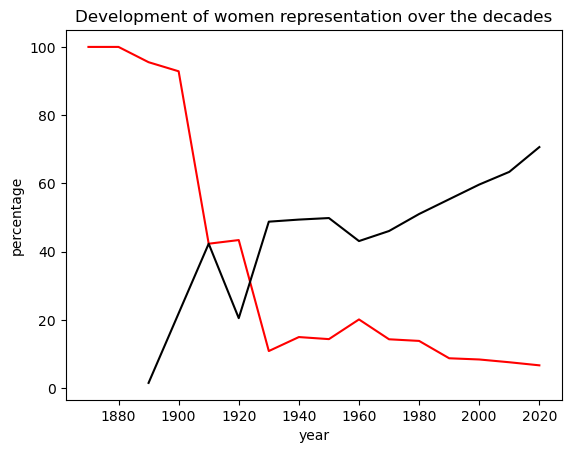

In [98]:
# Ploting the development for additional visualisation of the table above

bechdel_all_movies = pd.DataFrame.from_dict(bechdel_all_movies_1)
bechdel_all_movies["decade"] = bechdel_all_movies.year.apply(lambda x: (int(x) // 10) * 10)

filtered_1 = bechdel_all_movies[["rating",
                                 "decade",
                                 "id"
                                ]].groupby(["rating",
                                            "decade"],
                                           group_keys=False).count().groupby("decade",
                                                                             group_keys=False).apply(lambda x: 100 * x / x.sum()).reset_index().rename(columns={"id": "percentage"})

bechdel0 = filtered_1[filtered_1.rating == 0.0]
bechdel3 = filtered_1[filtered_1.rating == 3.0]

plt.plot(bechdel0.decade.unique(), bechdel0.percentage ,color = "red")
plt.plot(bechdel3.decade.unique(), bechdel3.percentage ,color = "black")
plt.title("Development of women representation over the decades")
plt.xlabel("year")
plt.ylabel("percentage")
plt.show()

#### Rational
It is shown that the number of movies increased over the decades.
The bechdel has an positiv trend regarding passing movies and the representation of women. The trend heavily increased from 1870 until 2020 regarding the percentage of pass rate of the bechdel test. The percentages of passing the bechdel test (rating=3) increased from zero in 1870 until 91.39% in 2020.

The grap is also shown the development and confirms the results mentioned above.
- Red line is the failed bedcheld tests without representative women
- Black line is including representative women with a passing bedcheld test

The red line thus the failed tests without women representative is decreasing over the decades until today
The black line with passing bedcheld tests of movies is increasing over decades until today

That means that the representative of women in movies is increasing.